In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Load data
df_gym = pd.read_csv('data\gym_members_exercise_tracking.csv')
df_mta = pd.read_csv("data\com_corp_mta.csv")

In [3]:
# Data Summary (gym_members_exercise_tracking)
print(df_gym.info())
print(df_gym.describe())
df_gym.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


**Source**: [Gym Members Exercise Dataset on Kaggle](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset)

In [4]:
# Data Summary (com_corp_mta)
print(df_mta.info())
print(df_mta.describe())
df_mta.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tiempo                     556 non-null    object 
 1   Peso                       278 non-null    object 
 2   Cambio                     278 non-null    object 
 3   IMC                        278 non-null    float64
 4   Grasa corporal             278 non-null    object 
 5   Masa muscular esquelética  278 non-null    object 
 6   Masa ósea                  278 non-null    object 
 7   Agua corporal              278 non-null    object 
 8   Unnamed: 8                 0 non-null      float64
dtypes: float64(2), object(7)
memory usage: 39.2+ KB
None
              IMC  Unnamed: 8
count  278.000000         0.0
mean    26.601079         NaN
std      1.033325         NaN
min     24.700000         NaN
25%     25.700000         NaN
50%     26.400000         NaN
75%     27.4

,Tiempo,Peso,Cambio,IMC,Grasa corporal,Masa muscular esquelética,Masa ósea,Agua corporal,Unnamed: 8
0,"Nov 7, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7:04 am,76.9 kg,0.2 kg,26.0,15.1 %,30.1 kg,4.8 kg,62.0 %,NaN
2,"Nov 6, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6:51 am,77.1 kg,0.0 kg,26.1,15.6 %,30.1 kg,4.8 kg,61.6 %,NaN
4,"Nov 5, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Source**: [Own registers via Garmin Index S2 scale](https://connect.garmin.com/modern/weight)

In [5]:
# Convert columns to string and handle NaN
numeric_columns = ['Peso', 'Cambio']

for col in numeric_columns:
    # Convert to string
    df_mta[col] = df_mta[col].astype(str)
    
    # Replace unwanted characters and convert to float
    df_mta[col] = df_mta[col].str.replace(' kg', '').str.replace(',', '.')
    
    # Convert to float (this will automatically handle NaN)
    df_mta[col] = pd.to_numeric(df_mta[col], errors='coerce')

# Show the resulting DataFrame
print(df_mta.info())
print(df_mta.describe())
df_mta.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tiempo                     556 non-null    object 
 1   Peso                       278 non-null    float64
 2   Cambio                     278 non-null    float64
 3   IMC                        278 non-null    float64
 4   Grasa corporal             278 non-null    object 
 5   Masa muscular esquelética  278 non-null    object 
 6   Masa ósea                  278 non-null    object 
 7   Agua corporal              278 non-null    object 
 8   Unnamed: 8                 0 non-null      float64
dtypes: float64(4), object(5)
memory usage: 39.2+ KB
None
             Peso      Cambio         IMC  Unnamed: 8
count  278.000000  278.000000  278.000000         0.0
mean    78.693525    0.613309   26.601079         NaN
std      3.060962    0.444139    1.033325         NaN
min   

,Tiempo,Peso,Cambio,IMC,Grasa corporal,Masa muscular esquelética,Masa ósea,Agua corporal,Unnamed: 8
0,"Nov 7, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7:04 am,76.9,0.2,26.0,15.1 %,30.1 kg,4.8 kg,62.0 %,NaN
2,"Nov 6, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6:51 am,77.1,0.0,26.1,15.6 %,30.1 kg,4.8 kg,61.6 %,NaN
4,"Nov 5, 2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Delete the column Unnamed: 8
df_mta.drop(columns=['Unnamed: 8'], inplace=True)

# Convert the Tiempo column to datetime
df_mta['Tiempo'] = pd.to_datetime(df_mta['Tiempo'], errors='coerce')

# Shift the values in the Tiempo column downwards
df_mta['Tiempo'] = df_mta['Tiempo'].shift(1)

# Function to clean and convert columns to float64
def clean_and_convert(column):
    return pd.to_numeric(column.str.replace(' kg', '').str.replace(' %', '').str.replace(',', '.'), errors='coerce')

# Clean and convert the specific columns
columns_to_convert = ['Grasa corporal', 
                       'Masa muscular esquelética', 
                       'Masa ósea', 
                       'Agua corporal']

for col in columns_to_convert:
    df_mta[col] = df_mta[col].astype(str)  # Ensure they are strings
    df_mta[col] = clean_and_convert(df_mta[col])  # Apply cleaning and conversion

# Show the resulting DataFrame
print(df_mta.info())
print(df_mta.describe())
df_mta.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tiempo                     192 non-null    datetime64[ns]
 1   Peso                       278 non-null    float64       
 2   Cambio                     278 non-null    float64       
 3   IMC                        278 non-null    float64       
 4   Grasa corporal             278 non-null    float64       
 5   Masa muscular esquelética  278 non-null    float64       
 6   Masa ósea                  278 non-null    float64       
 7   Agua corporal              278 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 34.9 KB
None


                    Tiempo        Peso      Cambio         IMC  \
count                  192  278.000000  278.000000  278.000000   
mean   2024-06-28 00:22:30   78.693525    0.613309   26.601079   
min    2023-11-10 00:00:00   73.100000    0.000000   24.700000   
25%    2024-05-13 18:00:00   76.100000    0.200000   25.700000   
50%    2024-06-30 12:00:00   78.200000    0.500000   26.400000   
75%    2024-09-18 06:00:00   81.000000    0.900000   27.400000   
max    2024-11-07 00:00:00   85.000000    2.300000   28.700000   
std                    NaN    3.060962    0.444139    1.033325   

       Grasa corporal  Masa muscular esquelética   Masa ósea  Agua corporal  
count      278.000000                 278.000000  278.000000     278.000000  
mean        19.804676                  31.856835    4.570144      58.544604  
min         13.900000                  29.100000    4.100000      52.300000  
25%         15.700000                  29.900000    4.500000      54.500000  
50%         17.

,Tiempo,Peso,Cambio,IMC,Grasa corporal,Masa muscular esquelética,Masa ósea,Agua corporal
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-07,76.9,0.2,26.0,15.1,30.1,4.8,62.0
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-11-06,77.1,0.0,26.1,15.6,30.1,4.8,61.6
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Delete rows that contain NaN
#df_mta = df_mta.dropna()
df_mta = df_mta[df_mta.index % 2 != 0]


In [8]:
print(df_mta.info())
print(df_mta.describe())
df_mta.head()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 1 to 555
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tiempo                     192 non-null    datetime64[ns]
 1   Peso                       278 non-null    float64       
 2   Cambio                     278 non-null    float64       
 3   IMC                        278 non-null    float64       
 4   Grasa corporal             278 non-null    float64       
 5   Masa muscular esquelética  278 non-null    float64       
 6   Masa ósea                  278 non-null    float64       
 7   Agua corporal              278 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 19.5 KB
None
                    Tiempo        Peso      Cambio         IMC  \
count                  192  278.000000  278.000000  278.000000   
mean   2024-06-28 00:22:30   78.693525    0.613309   26.601079   
min    2

,Tiempo,Peso,Cambio,IMC,Grasa corporal,Masa muscular esquelética,Masa ósea,Agua corporal
1,2024-11-07,76.9,0.2,26.0,15.1,30.1,4.8,62.0
3,2024-11-06,77.1,0.0,26.1,15.6,30.1,4.8,61.6
5,2024-11-05,77.1,0.4,26.0,16.4,30.1,4.7,61.1
7,2024-11-04,77.5,0.1,26.2,16.4,30.2,4.7,61.0
9,2024-11-03,77.4,0.9,26.2,15.8,30.2,4.8,61.4


In [9]:
# Rename columns
df_mta.rename(columns={
    'Tiempo': 'Date',
    'Peso': 'Weight_kg',
    'IMC': 'BMI',
    'Grasa corporal': 'Fat_Percentage',
    'Masa muscular esquelética': 'Muscle_mass_kg',
    'Masa ósea': 'Bone_mass_kg',
    'Agua corporal': 'Body_water_Percentage'
}, inplace=True)

# Delete the "Change" column
df_mta.drop(columns=['Cambio'], inplace=True)

# Display the modified DataFrame
print(df_mta)
df_mta.info()
df_mta.head()


          Date  Weight_kg   BMI  Fat_Percentage  Muscle_mass_kg  Bone_mass_kg  \
1   2024-11-07       76.9  26.0            15.1            30.1           4.8   
3   2024-11-06       77.1  26.1            15.6            30.1           4.8   
5   2024-11-05       77.1  26.0            16.4            30.1           4.7   
7   2024-11-04       77.5  26.2            16.4            30.2           4.7   
9   2024-11-03       77.4  26.2            15.8            30.2           4.8   
..         ...        ...   ...             ...             ...           ...   
547 2023-11-16       79.9  27.0            26.1            31.6           4.2   
549 2023-11-15       79.9  27.0            25.2            31.6           4.3   
551 2023-11-14       80.7  27.3            26.0            31.8           4.2   
553 2023-11-13       80.6  27.3            25.7            31.8           4.3   
555 2023-11-10       80.0  27.0            25.7            31.6           4.2   

     Body_water_Percentage 

,Date,Weight_kg,BMI,Fat_Percentage,Muscle_mass_kg,Bone_mass_kg,Body_water_Percentage
1,2024-11-07,76.9,26.0,15.1,30.1,4.8,62.0
3,2024-11-06,77.1,26.1,15.6,30.1,4.8,61.6
5,2024-11-05,77.1,26.0,16.4,30.1,4.7,61.1
7,2024-11-04,77.5,26.2,16.4,30.2,4.7,61.0
9,2024-11-03,77.4,26.2,15.8,30.2,4.8,61.4


In [10]:
# Calculate Muscle and Bone Mass as percentages of total weight, rounding to 1 decimal place
df_mta['Muscle_Mass_Percentage'] = ((df_mta['Muscle_mass_kg'] / df_mta['Weight_kg']) * 100).round(1)
df_mta['Bone_Mass_Percentage'] = ((df_mta['Bone_mass_kg'] / df_mta['Weight_kg']) * 100).round(1)

# Drop the original 'Muscle_mass_kg' and 'Bone_mass_kg' columns
df_mta = df_mta.drop(columns=['Muscle_mass_kg', 'Bone_mass_kg'])

# Display the updated DataFrame
df_mta.head()
df_mta.to_csv('df_mta.csv')


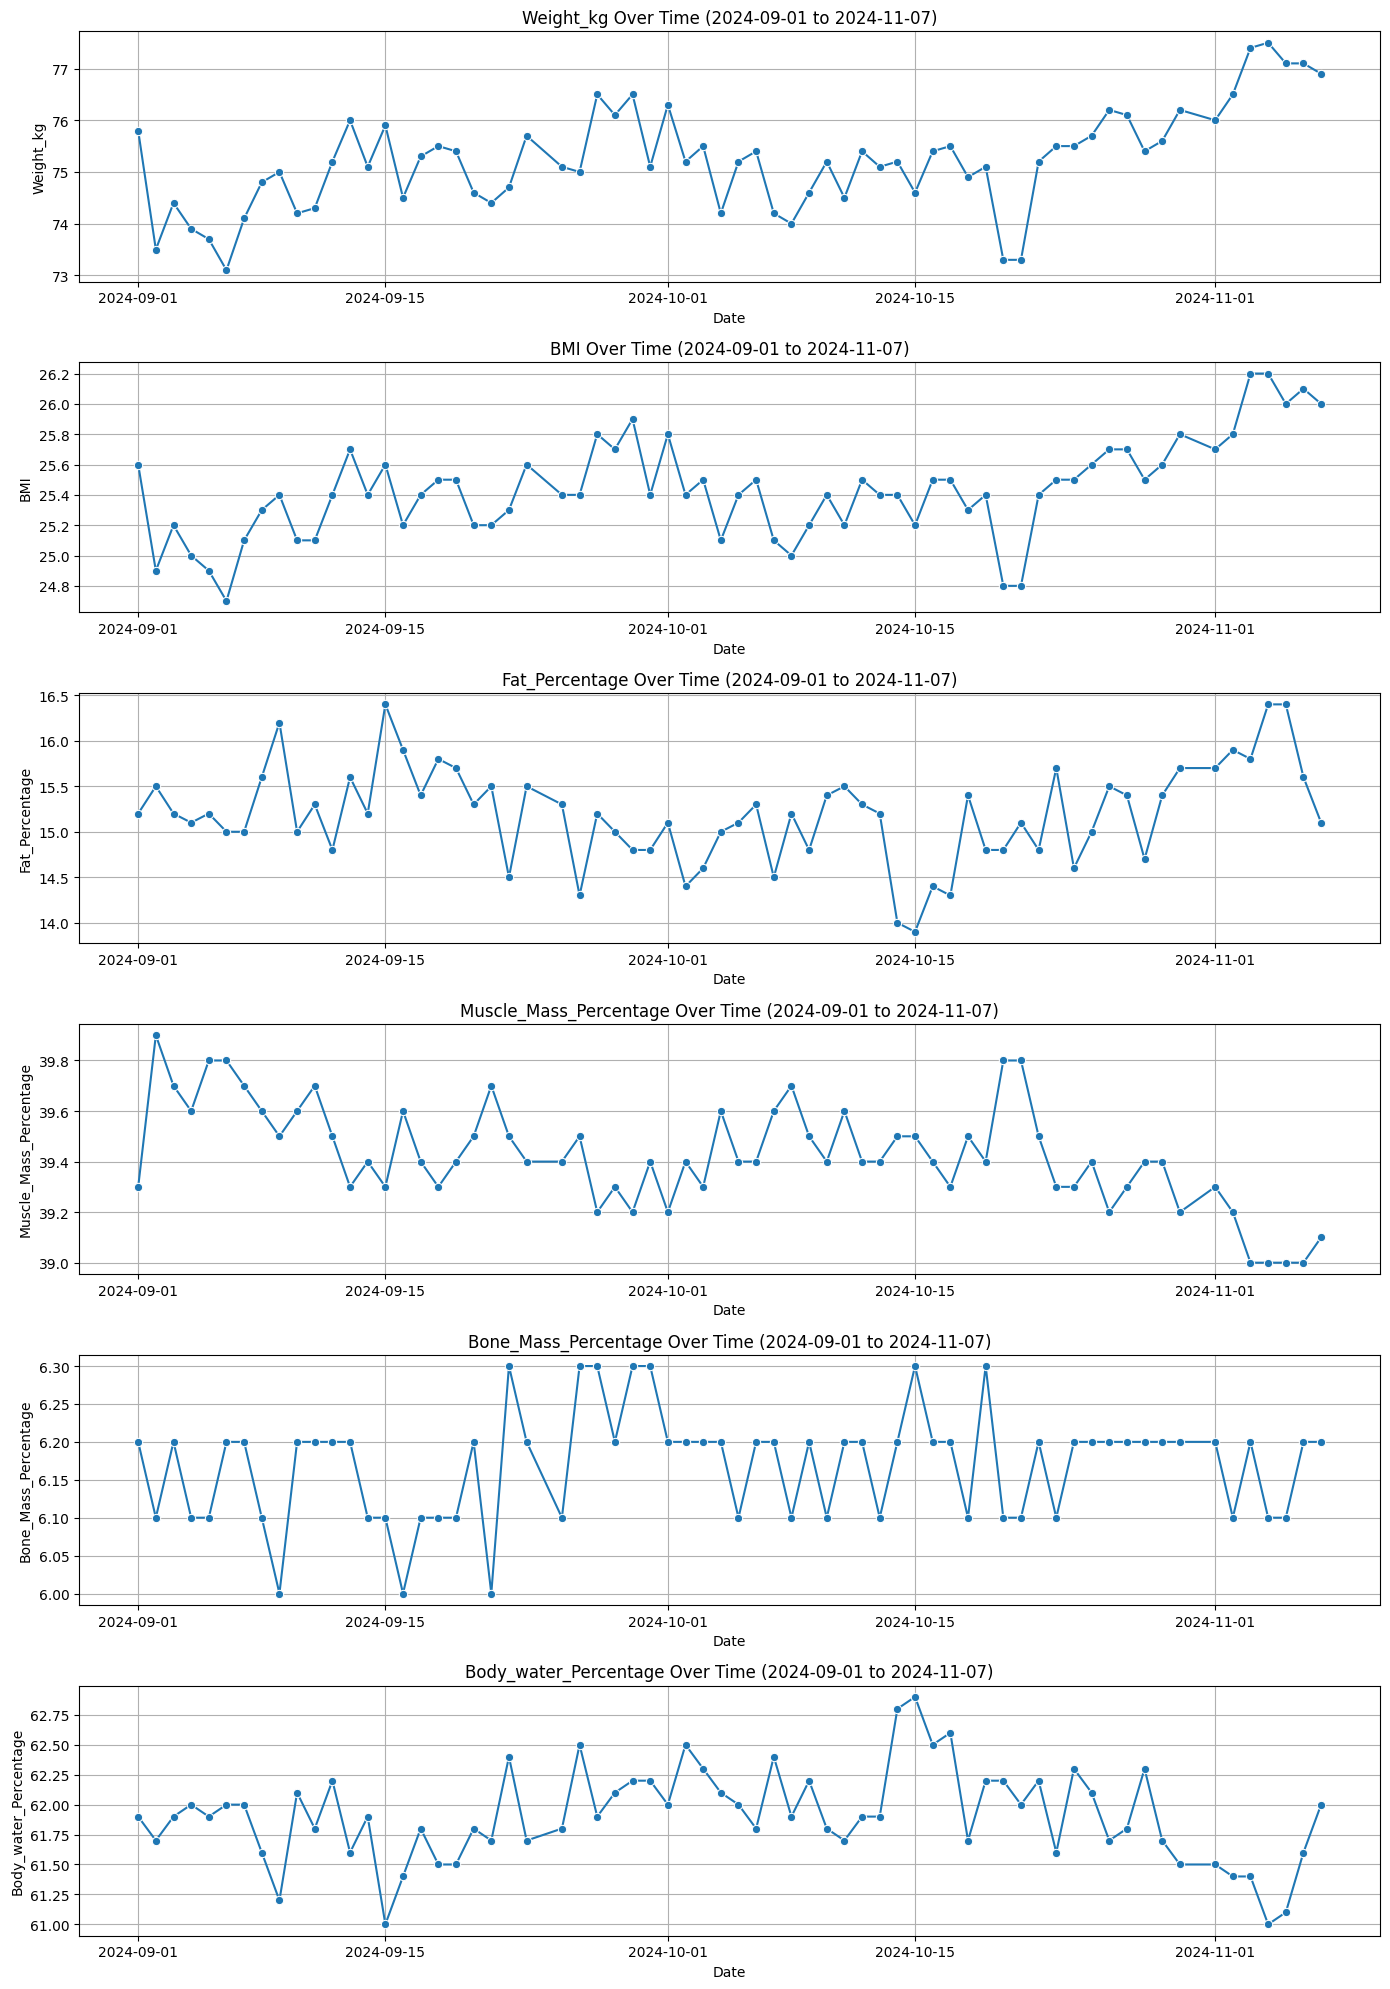

In [11]:
# Filter the DataFrame for the desired date range
start_date = '2024-09-01'
end_date = '2024-11-07'
df_interval = df_mta[(df_mta['Date'] >= start_date) & (df_mta['Date'] <= end_date)]

# Define the metrics to analyze
metrics = ['Weight_kg', 'BMI', 'Fat_Percentage', 'Muscle_Mass_Percentage', 'Bone_Mass_Percentage', 'Body_water_Percentage']

# Create plots for the selected time interval
fig, axes = plt.subplots(len(metrics), 1, figsize=(14, 20))
for i, metric in enumerate(metrics):
    sns.lineplot(x='Date', y=metric, data=df_interval, ax=axes[i], marker='o')
    axes[i].set_title(f'{metric} Over Time ({start_date} to {end_date})')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

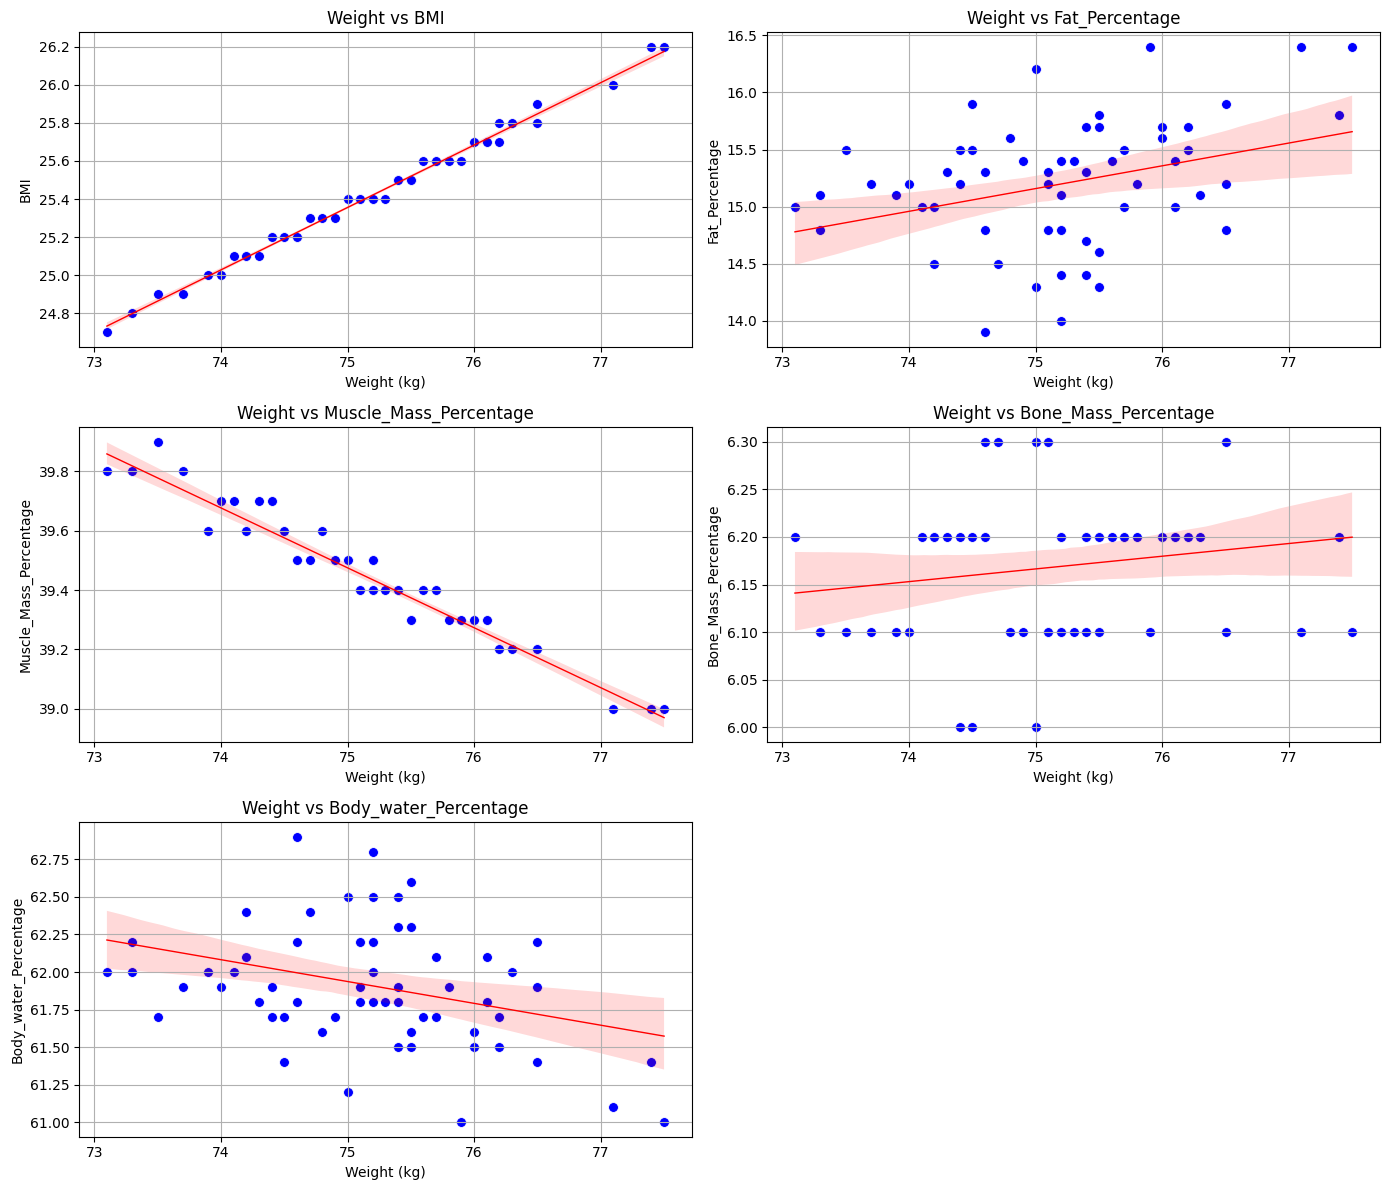

In [12]:
# Filter the DataFrame for the specified date range
start_date = '2024-09-01'
end_date = '2024-11-05'
df_interval = df_mta[(df_mta['Date'] >= start_date) & (df_mta['Date'] <= end_date)]

# Define the metrics to compare
metrics_to_compare = ['BMI', 'Fat_Percentage', 'Muscle_Mass_Percentage', 'Bone_Mass_Percentage', 'Body_water_Percentage']

# Setting up the plot grid
plt.figure(figsize=(14, 12))
for i, metric in enumerate(metrics_to_compare, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x='Weight_kg', y=metric, data=df_interval, color='blue', s=50)
    sns.regplot(x='Weight_kg', y=metric, data=df_interval, scatter=False, color='red', line_kws={"linewidth": 1})
    plt.title(f'Weight vs {metric}')
    plt.xlabel('Weight (kg)')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
# Data Summary (gym_members_exercise_tracking)
print(df_gym.info())
print(df_gym.describe())
df_gym.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


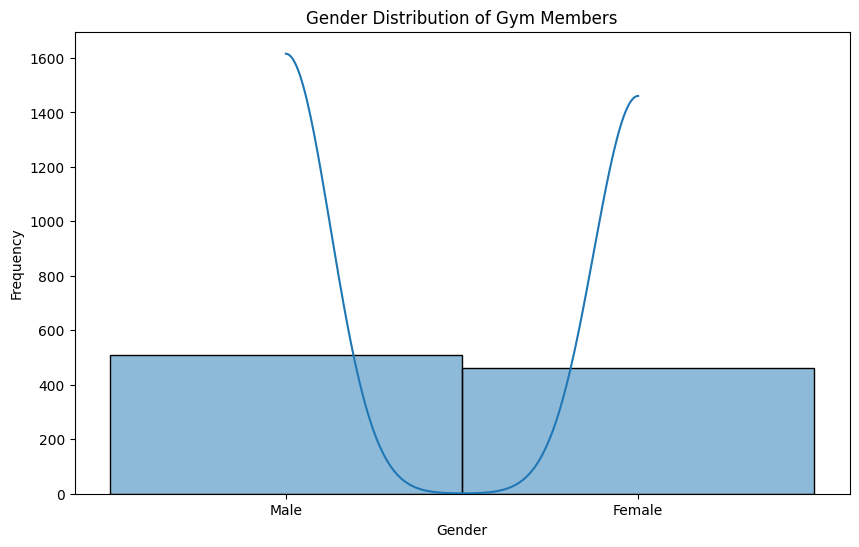

In [14]:
# Gender Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_gym['Gender'], bins=15, kde=True)
plt.title('Gender Distribution of Gym Members')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Focus just on males
df_gym_male = df_gym[df_gym['Gender'] == 'Male']

# show the df
df_gym_male.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34


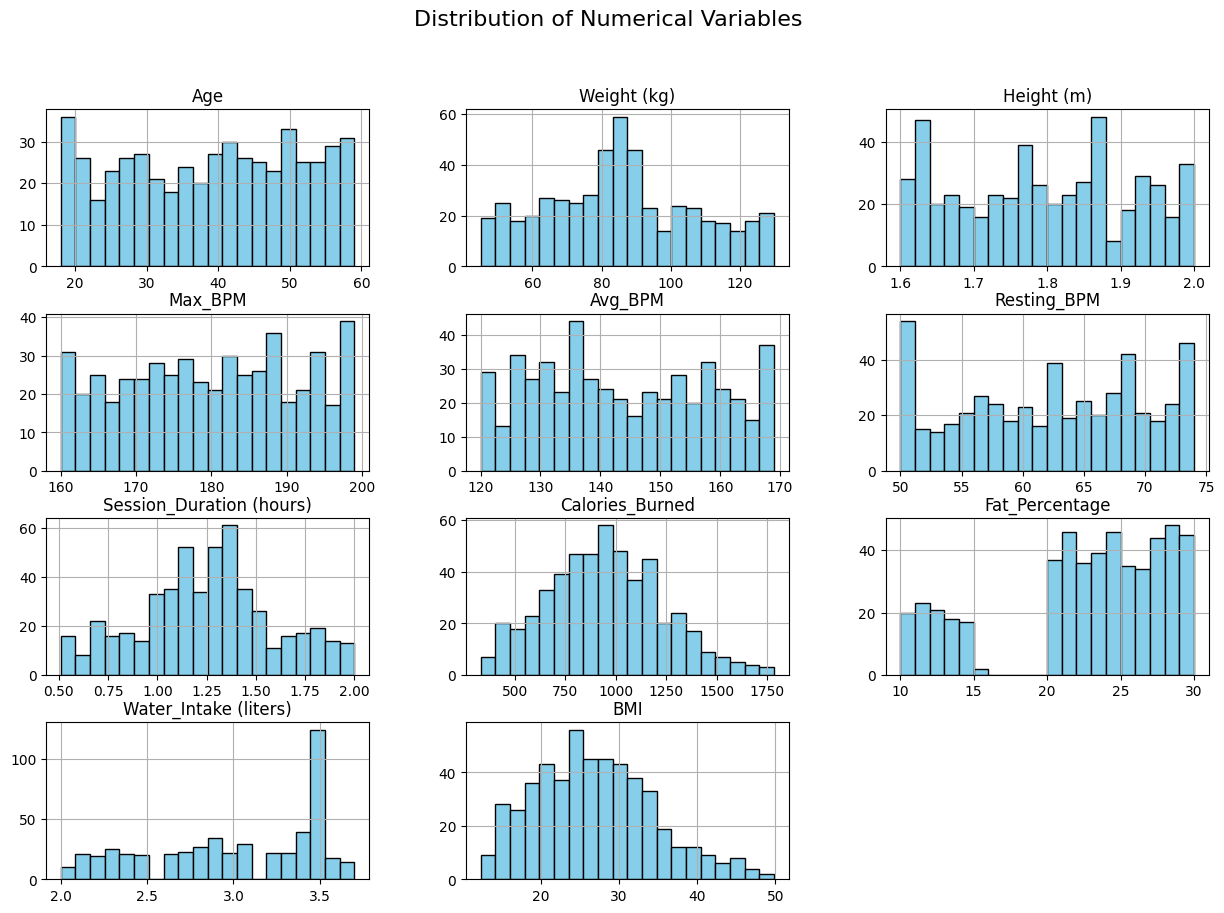

In [16]:
# 1. Basic Statistics and Distribution of Numerical Variables: 

# Check distributions of numerical columns
numeric_columns = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 
                   'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 
                   'Fat_Percentage', 'Water_Intake (liters)', 'BMI']

# Plot histograms for each numerical column
df_gym_male[numeric_columns].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

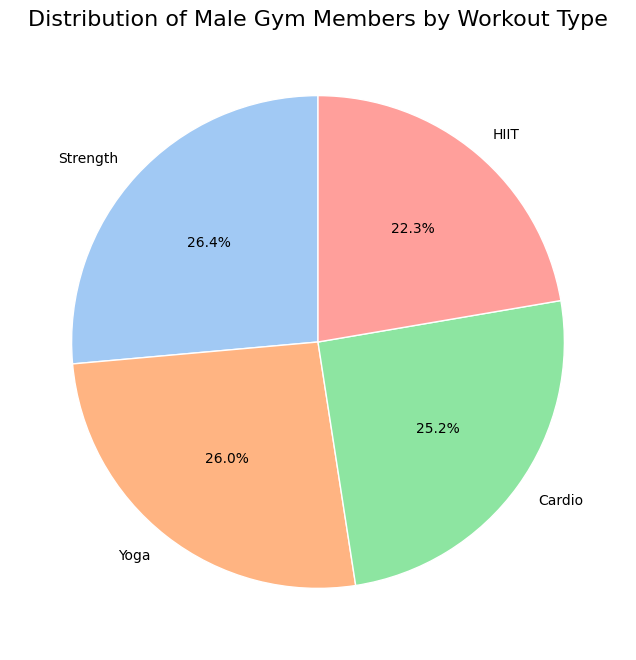

In [17]:
# Pie chart of workout types
plt.figure(figsize=(8, 8))
workout_counts = df_gym_male['Workout_Type'].value_counts()
workout_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops=dict(edgecolor='white')
)
plt.title("Distribution of Male Gym Members by Workout Type", fontsize=16)
plt.ylabel('')  # Hide the y-label
plt.show()

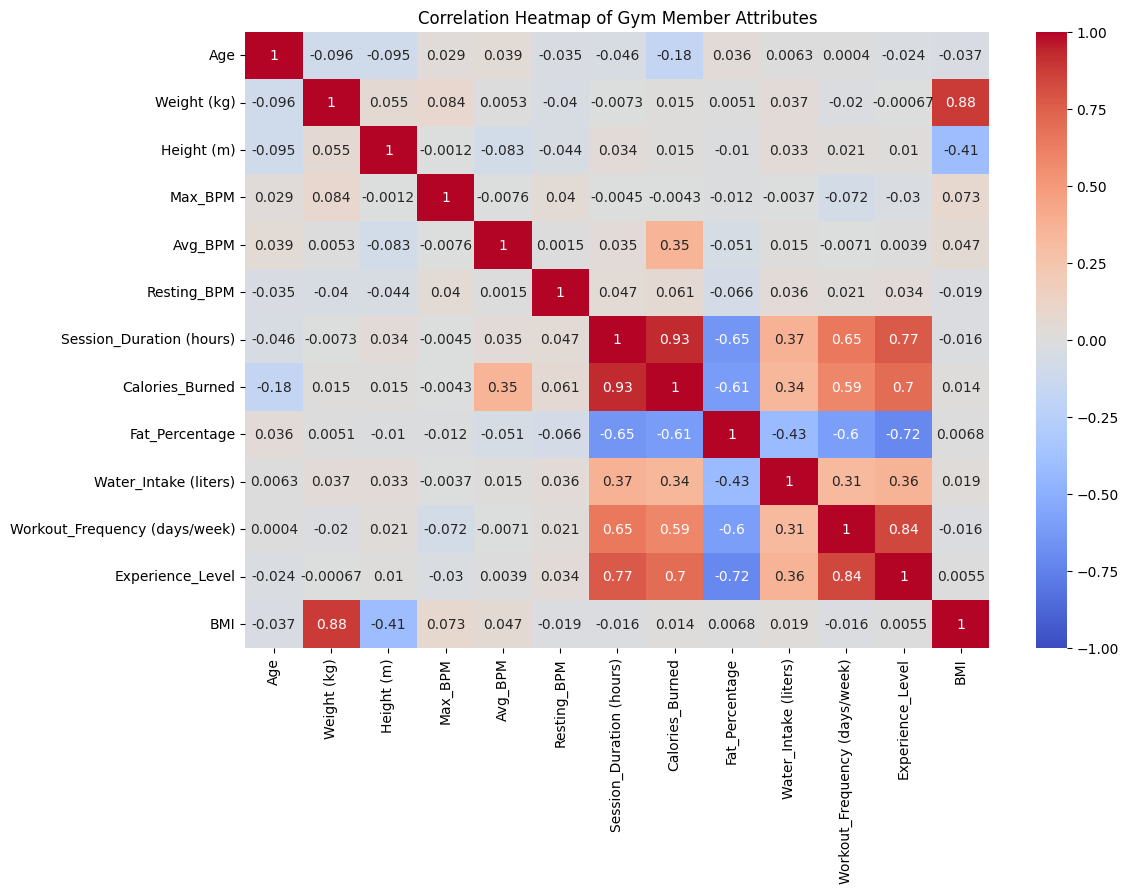

In [18]:
#2. Correlation Analysis: 

# Select only numeric columns for the correlation matrix
numeric_df = df_gym_male.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Gym Member Attributes")
plt.show()


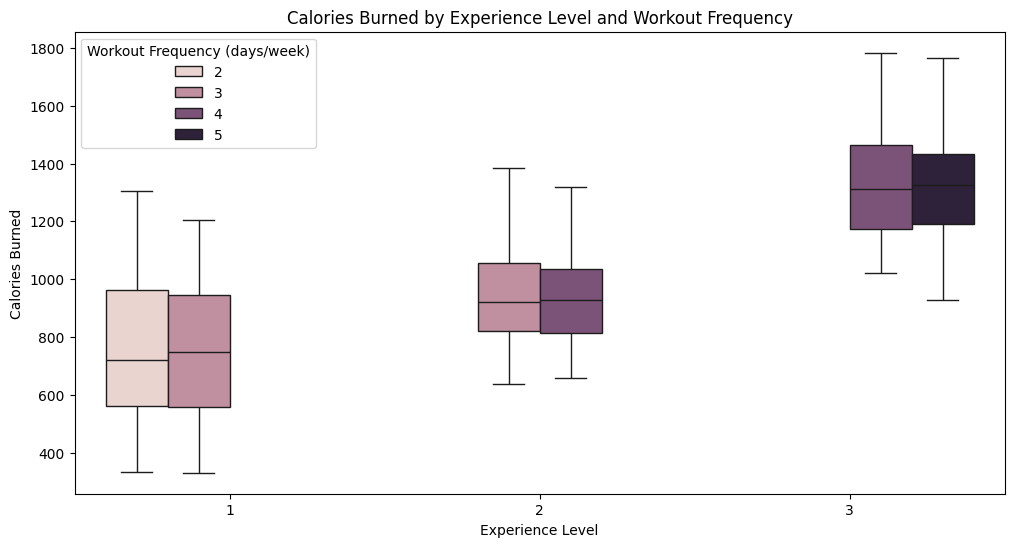

In [19]:
# 3. Workout Frequency Analysis: 

# Calories burned by experience level and workout frequency
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_male, x='Experience_Level', y='Calories_Burned', hue='Workout_Frequency (days/week)')
plt.title("Calories Burned by Experience Level and Workout Frequency")
plt.xlabel("Experience Level")
plt.ylabel("Calories Burned")
plt.legend(title='Workout Frequency (days/week)')
plt.show()

In [20]:
'''
# 4. Gender-Based Analysis:

# BMI comparison by gender
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_gym, x='Gender', y='BMI')
plt.title("BMI Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

# Fat Percentage comparison by gender
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_gym, x='Gender', y='Fat_Percentage')
plt.title("Fat Percentage by Gender")
plt.xlabel("Gender")
plt.ylabel("Fat Percentage")
plt.show()
'''

'\n# 4. Gender-Based Analysis:\n\n# BMI comparison by gender\nplt.figure(figsize=(10, 5))\nsns.boxplot(data=df_gym, x=\'Gender\', y=\'BMI\')\nplt.title("BMI Distribution by Gender")\nplt.xlabel("Gender")\nplt.ylabel("BMI")\nplt.show()\n\n# Fat Percentage comparison by gender\nplt.figure(figsize=(10, 5))\nsns.boxplot(data=df_gym, x=\'Gender\', y=\'Fat_Percentage\')\nplt.title("Fat Percentage by Gender")\nplt.xlabel("Gender")\nplt.ylabel("Fat Percentage")\nplt.show()\n'

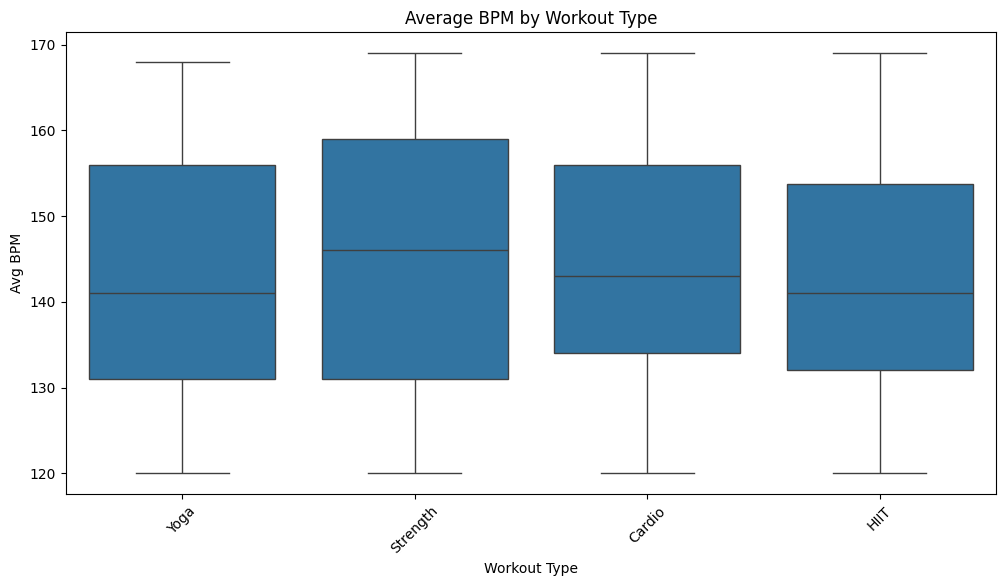

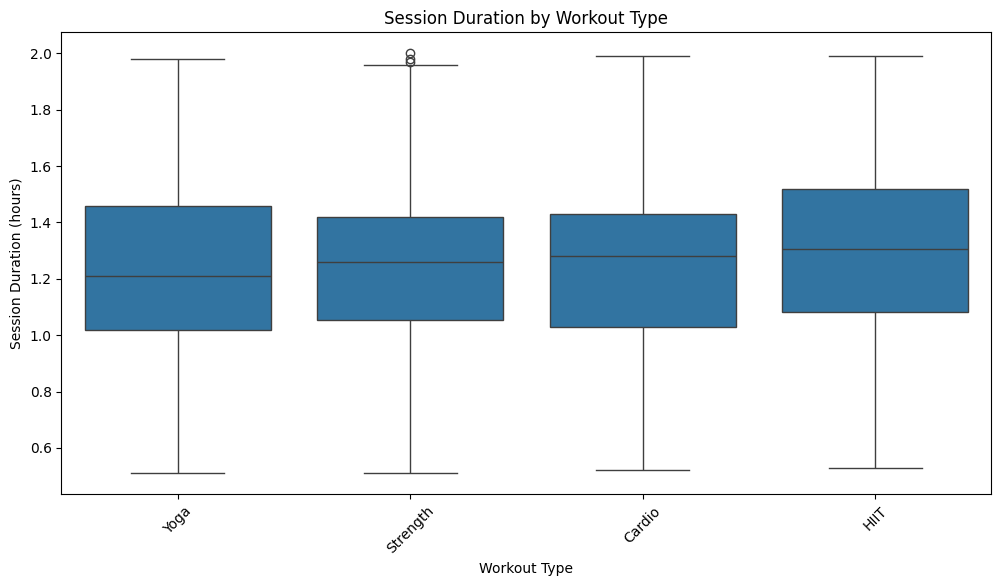

In [21]:
# 5. Workout Type Analysis

# Avg BPM by Workout Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_male, x='Workout_Type', y='Avg_BPM')
plt.title("Average BPM by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Avg BPM")
plt.xticks(rotation=45)
plt.show()

# Session duration by Workout Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_male, x='Workout_Type', y='Session_Duration (hours)')
plt.title("Session Duration by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Session Duration (hours)")
plt.xticks(rotation=45)
plt.show()


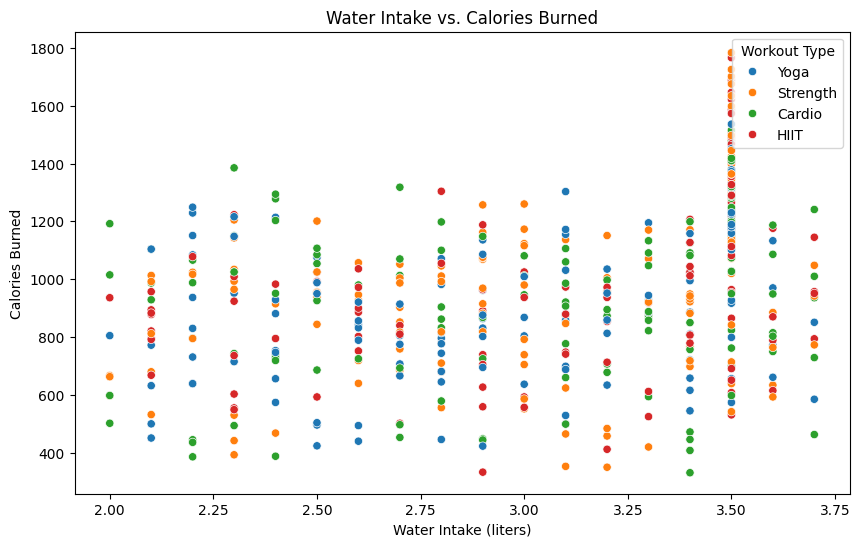

In [22]:
# 6. Analysis of Water Intake

# Scatter plot for Water Intake and Calories Burned
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_gym_male, x='Water_Intake (liters)', y='Calories_Burned', hue='Workout_Type')
plt.title("Water Intake vs. Calories Burned")
plt.xlabel("Water Intake (liters)")
plt.ylabel("Calories Burned")
plt.legend(title="Workout Type")
plt.show()


C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\3773122404.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym_male, x='Experience_Level', y='Age', palette='viridis')


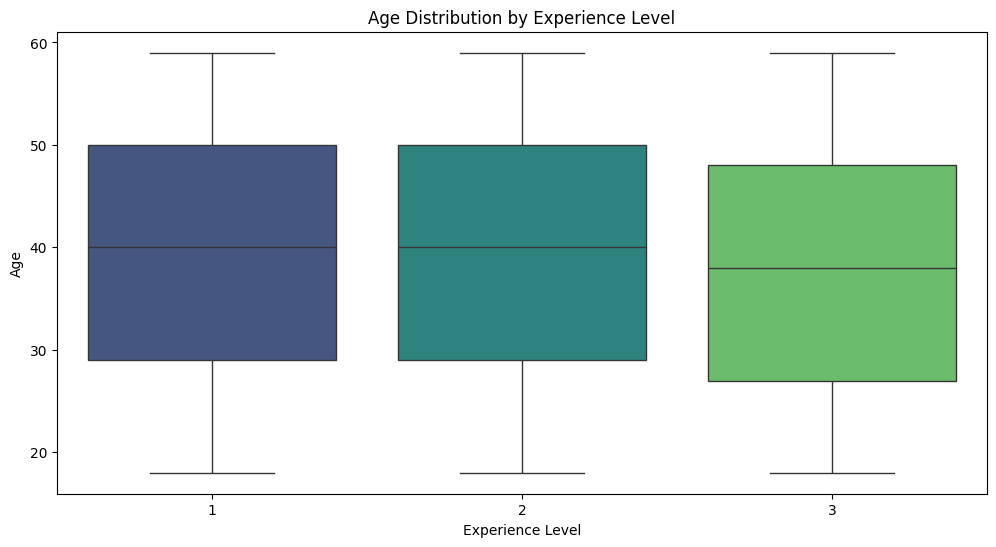

In [23]:
# 7. Age Distribution by Experience Level

# Age distribution by experience level
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_male, x='Experience_Level', y='Age', palette='viridis')
plt.title("Age Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Age")
plt.show()

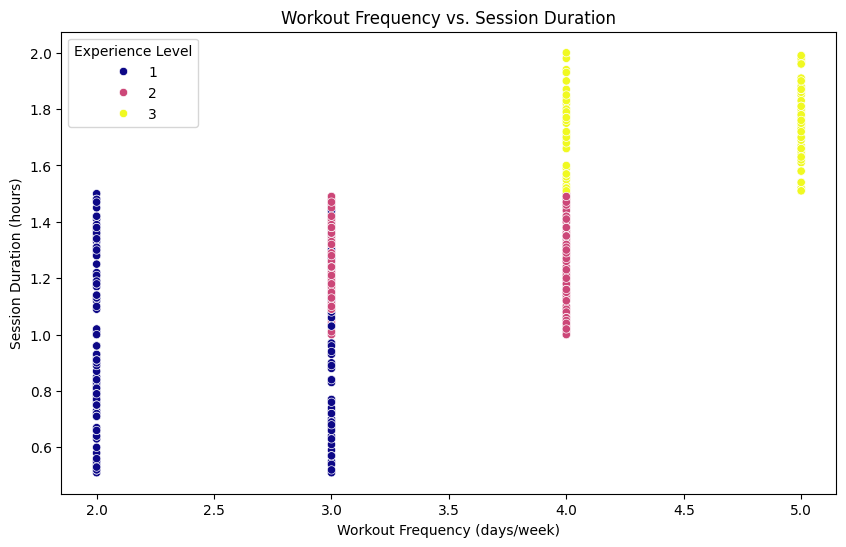

In [24]:
# 8. Session Duration vs. Workout Frequency:

# Scatter plot for Session Duration and Workout Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_gym_male, x='Workout_Frequency (days/week)', y='Session_Duration (hours)', hue='Experience_Level', palette='plasma')
plt.title("Workout Frequency vs. Session Duration")
plt.xlabel("Workout Frequency (days/week)")
plt.ylabel("Session Duration (hours)")
plt.legend(title="Experience Level")
plt.show()

In [25]:
# 9. Statistical Summary of Key Variables by Experience Level

# Group by Experience Level for a summary
experience_summary = df_gym_male.groupby('Experience_Level').agg({
    'Age': ['mean', 'std'],
    'BMI': ['mean', 'std'],
    'Calories_Burned': ['mean', 'std'],
    'Fat_Percentage': ['mean', 'std'],
    'Session_Duration (hours)': ['mean', 'std']
})

# Display the summary
print(experience_summary)


                        Age                   BMI           Calories_Burned  \
                       mean        std       mean       std            mean   
Experience_Level                                                              
1                 39.111675  12.163332  26.636954  7.967031      756.213198   
2                 39.305164  12.046131  27.274695  8.617049      935.295775   
3                 38.128713  11.889208  26.556931  3.816468     1330.940594   

                             Fat_Percentage            \
                         std           mean       std   
Experience_Level                                        
1                 240.305153      25.203046  2.885766   
2                 156.650078      24.928169  2.962144   
3                 181.186413      12.379208  1.457760   

                 Session_Duration (hours)            
                                     mean       std  
Experience_Level                                     
1                   

C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\1582738136.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gym_male, x='Experience_Level', y=var, ax=axes[row, col], palette="viridis")
C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\1582738136.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gym_male, x='Experience_Level', y=var, ax=axes[row, col], palette="viridis")
C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\1582738136.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gym_male, x='Experience_Level'

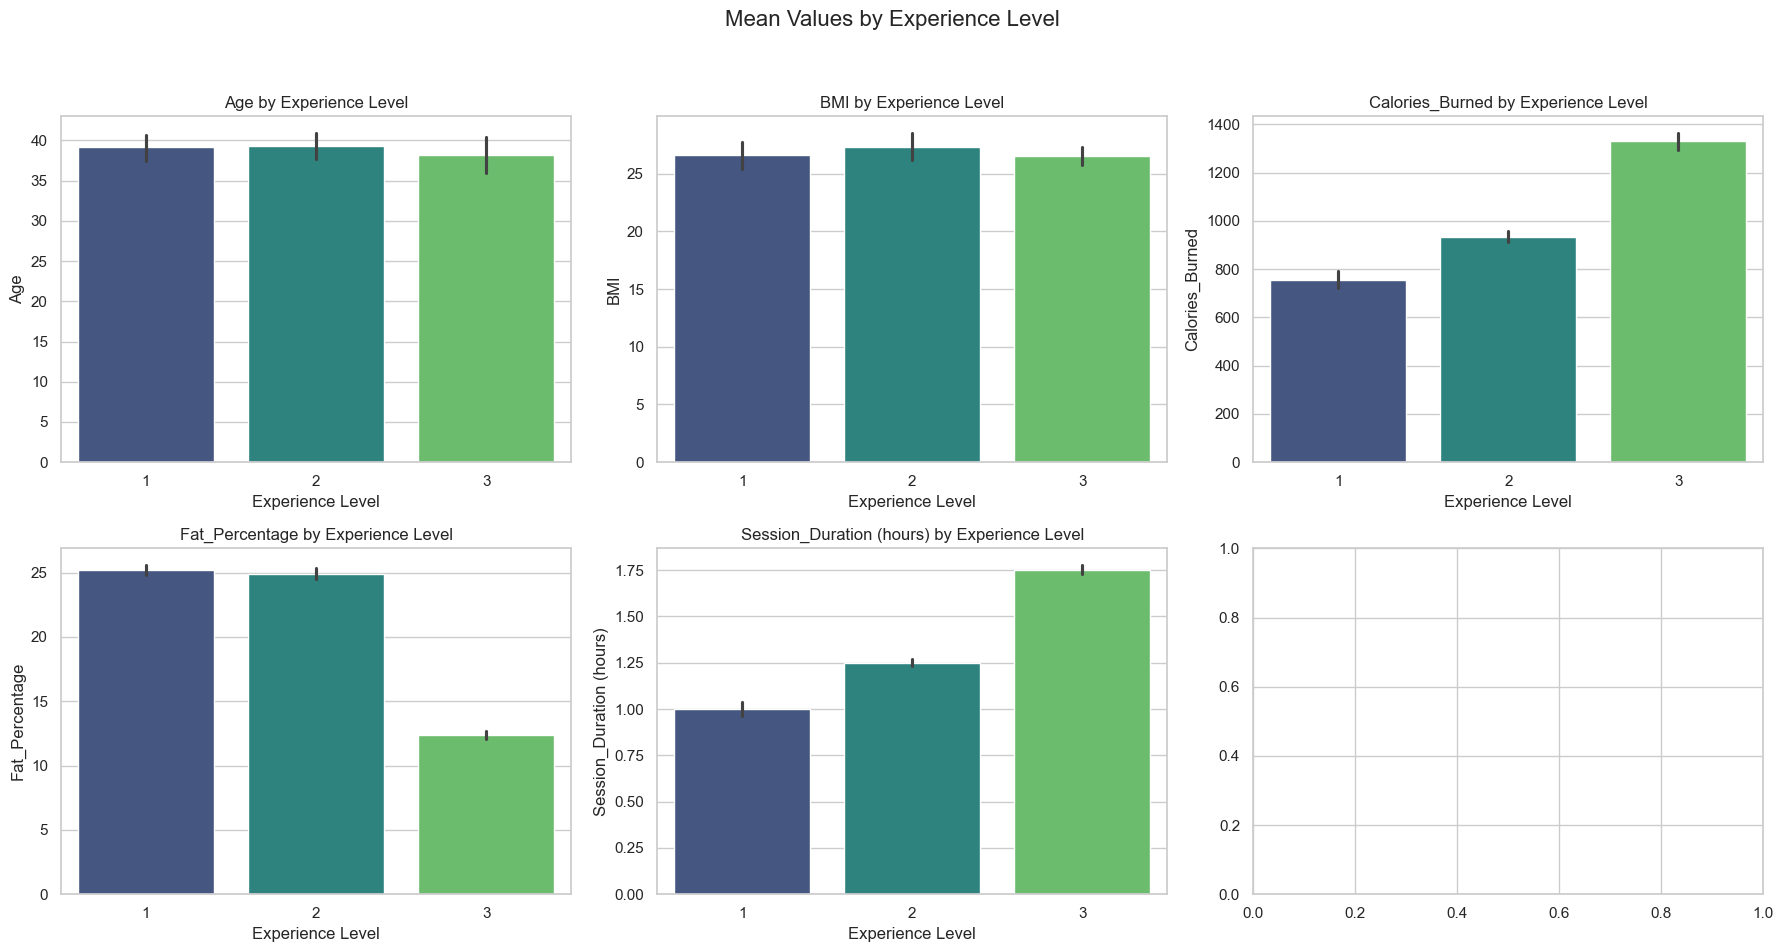

In [26]:
# 9.1. Bar Plots for Mean Values by Experience Level:

# Set plot style
sns.set(style="whitegrid")

# Plot each variable by Experience_Level
variables = ['Age', 'BMI', 'Calories_Burned', 'Fat_Percentage', 'Session_Duration (hours)']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Mean Values by Experience Level", fontsize=16)

# Loop over each variable to create bar plots
for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.barplot(data=df_gym_male, x='Experience_Level', y=var, ax=axes[row, col], palette="viridis")
    axes[row, col].set_title(f"{var} by Experience Level")
    axes[row, col].set_xlabel("Experience Level")
    axes[row, col].set_ylabel(var)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\3994374072.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym_male, x='Experience_Level', y=var, ax=axes[row, col], palette="coolwarm")
C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\3994374072.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym_male, x='Experience_Level', y=var, ax=axes[row, col], palette="coolwarm")
C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\3994374072.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_gym_male, x='Experience_Leve

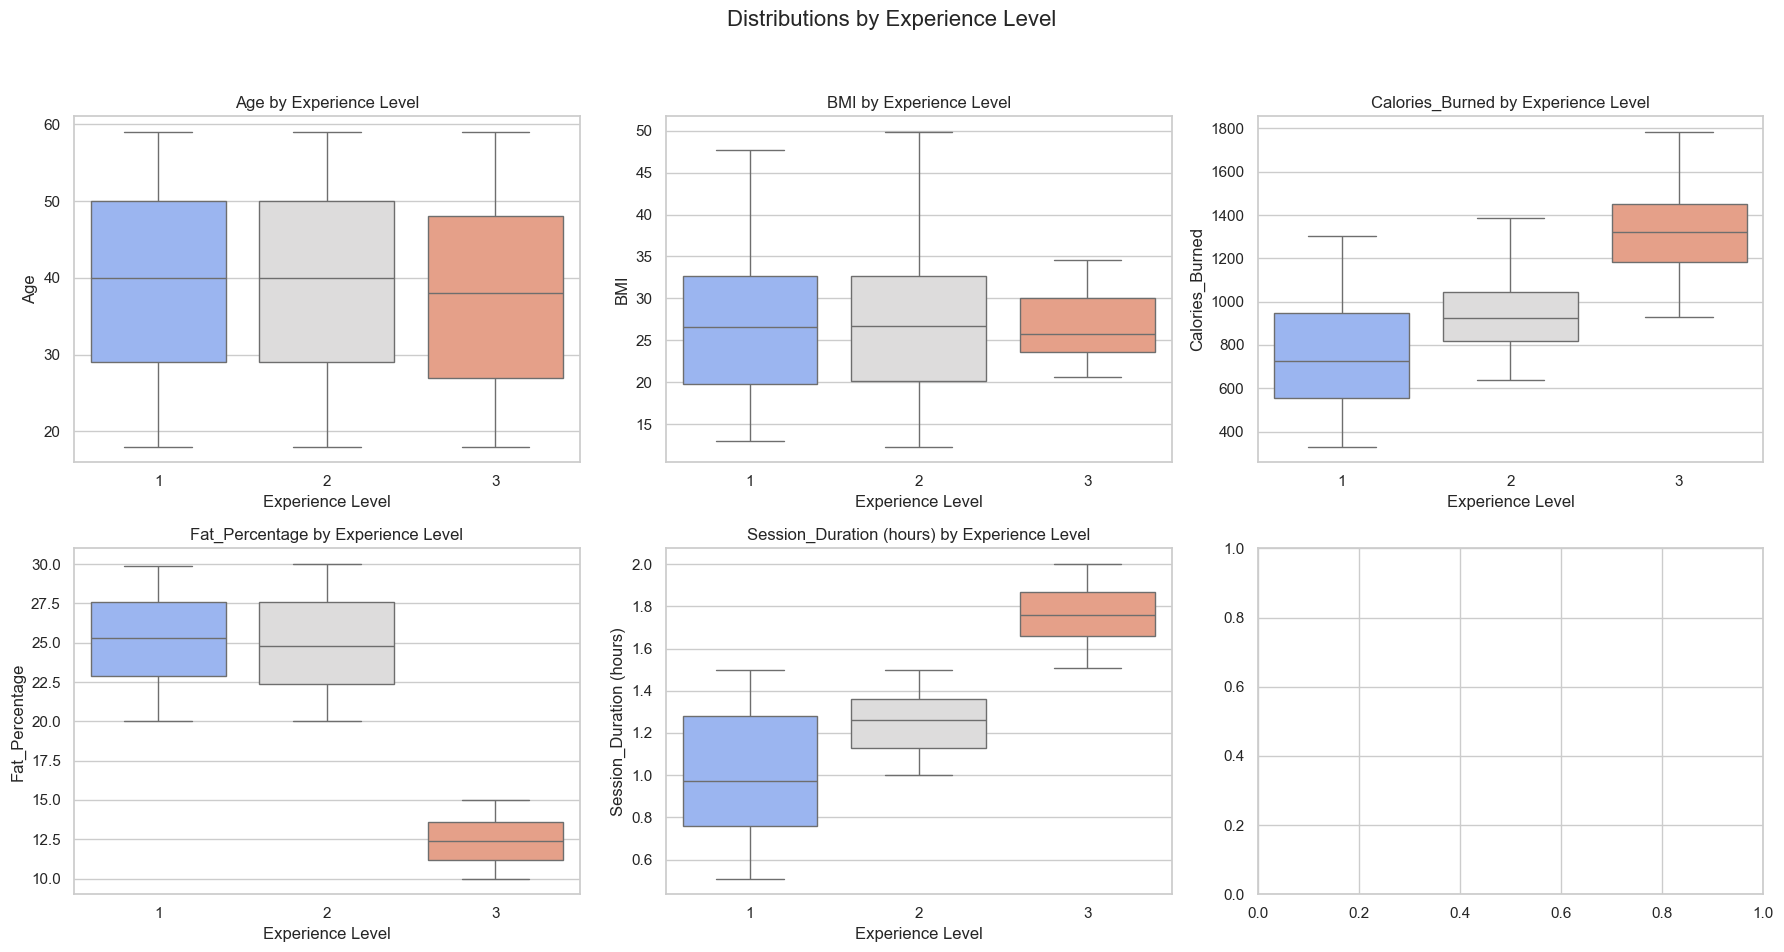

In [27]:
# 9.2. Box Plots for Distributions by Experience Level:

# Plot each variable by Experience_Level using box plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distributions by Experience Level", fontsize=16)

# Loop over each variable to create box plots
for i, var in enumerate(variables):
    row, col = divmod(i, 3)
    sns.boxplot(data=df_gym_male, x='Experience_Level', y=var, ax=axes[row, col], palette="coolwarm")
    axes[row, col].set_title(f"{var} by Experience Level")
    axes[row, col].set_xlabel("Experience Level")
    axes[row, col].set_ylabel(var)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

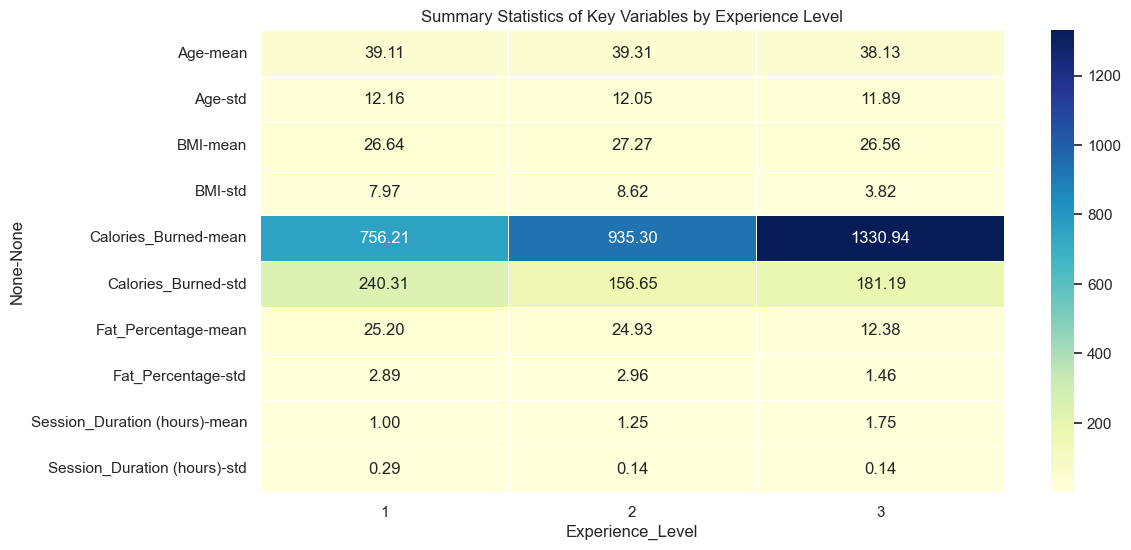

In [28]:
# 9.3. Heatmap for Mean and Standard Deviation:

# Calculate the summary stats
experience_summary = df_gym_male.groupby('Experience_Level').agg({
    'Age': ['mean', 'std'],
    'BMI': ['mean', 'std'],
    'Calories_Burned': ['mean', 'std'],
    'Fat_Percentage': ['mean', 'std'],
    'Session_Duration (hours)': ['mean', 'std']
}).round(2)  # Round for cleaner display

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(experience_summary.T, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Summary Statistics of Key Variables by Experience Level")
plt.show()


# Hypothesis 1:
**BMI alone is not a reliable indicator of health**

**Approach:**
- Compare BMI with other health indicators, such as body fat percentage.
- Analyze cases where a "normal" or "high" BMI does not correspond to a healthy body composition.

**Analysis Objective:**
- Show that BMI is a limited measure and that it needs to be complemented with other factors for an accurate health assessment.

---

# Hypothesis 2:
**Body composition based on muscle mass percentage and body fat percentage are good indicators of health**

**Approach:**
- Study the relationship between body fat percentage, muscle mass, and health markers (such resting heart rate, etc.).
- Compare different body composition profiles and evaluate their connection to fitness and chronic disease risk.

**Analysis Objective:**
- Validate that a body composition with a lower body fat percentage and an appropriate level of muscle mass correlates better with overall health than BMI alone.

---

# Hypothesis 3:
**Identify which exercises and training routines are most effective for improving body composition with maximum efficiency**

**Approach:**
- Analyze the effectiveness of various types of training (strength, HIIT, cardio) in reducing body fat and increasing muscle mass.
- Assess the optimal training frequency and duration to maximize results in body composition.

**Analysis Objective:**
- Identify specific training routines that provide the best effort-to-benefit ratio for body composition improvement, based on data like fat reduction and muscle mass increase.

---

# Hypothesis 4:
**Client segmentation for a targeted marketing campaign based on data**

**Segmentation Strategies:**
1. **High body fat percentage**:
   - Offer diet plans and personal training focused on fat reduction.

2. **Low training frequency**:
   - Promote personal training services to boost performance.
   - Organize seminars or outdoor weekend training sessions to encourage attendance and motivation.

3. **Sports supplementation based on client profile**:
   - Provide recommendations for specific supplements (protein, BCAAs, vitamins) tailored to their goals and activity level.

**Analysis Objective:**
- Create a segmentation system based on body composition data and training habits, enabling more personalized and effective marketing campaigns.

---

These approaches and objectives guide the analysis and actions needed to test the proposed hypotheses, optimizing both health outcomes and marketing strategies.




# Hypothesis 1:
**BMI alone is not a reliable indicator of health**

**Approach:**
- Compare BMI with other health indicators, such as body fat percentage.
- Analyze cases where a "normal" or "high" BMI does not correspond to a healthy body composition.

**Analysis Objective:**
- Show that BMI is a limited measure and that it needs to be complemented with other factors for an accurate health assessment.

# Healthy Body Composition for Men

For men, healthy body composition guidelines include not only BMI and body fat percentage but also muscle mass percentage, which provides a more detailed picture of lean body mass.

## 1. BMI for Men
The BMI categories are standard for both men and women:
- **Underweight**: BMI < 18.5
- **Normal weight**: BMI 18.5–24.9
- **Overweight**: BMI 25–29.9
- **Obesity**: BMI ≥ 30

## 2. Body Fat Percentage for Men
Typical healthy ranges of body fat percentage for men by age:
- **Ages 20-39**: 8-19%
- **Ages 40-59**: 11-21%
- **Ages 60-79**: 13-24%

## 3. Muscle Mass Percentage for Men
Muscle mass percentage can vary by age and activity level, but here are general guidelines:
- **Ages 20-39**: 33-39%
- **Ages 40-59**: 30-36%
- **Ages 60-79**: 27-34%

These values reflect the percentage of total body weight made up of muscle. Higher percentages indicate greater lean mass, which often correlates with strength and a lower risk of health issues associated with muscle loss.

## 4. Combining BMI, Body Fat, and Muscle Mass
A healthy body composition for men typically means:
- **BMI** within the normal range (18.5–24.9).
- **Body Fat Percentage** between 8-19% (for younger men) or 11-24% (for older men).
- **Muscle Mass Percentage** of 33-39% (for younger men) or 27-36% (for older men).

### Example Interpretations:
- **Normal BMI, Low Body Fat, and High Muscle Mass**: Indicates a lean, muscular body composition.
- **Normal BMI, High Body Fat, and Low Muscle Mass**: Suggests a need to reduce body fat and potentially increase muscle mass.
- **High BMI, High Muscle Mass, and Low Body Fat**: Often seen in athletes; high BMI due to muscle mass rather than fat, which typically does not indicate health risk.
- **High BMI, High Body Fat, and Low Muscle Mass**: Indicates a higher health risk due to excess fat and low muscle mass.

Using these three metrics together offers a comprehensive assessment of body composition and a more nuanced view of health than BMI alone.


# Sources for Healthy Body Composition Guidelines

The following sources provide evidence-based guidelines and research on BMI, body fat percentage, and muscle mass percentage, helping to create a comprehensive picture of healthy body composition.

## 1. **BMI (Body Mass Index)**
   - **World Health Organization (WHO)**: WHO offers standardized guidelines for BMI categories, which are used globally for assessing underweight, normal weight, overweight, and obesity in both men and women.
     - [WHO BMI Guidelines](https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight)

   - **Centers for Disease Control and Prevention (CDC)**: The CDC adopts WHO’s BMI categories as a standard metric for assessing weight.
     - [CDC BMI Information](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)

## 2. **Body Fat Percentage**
   - **American Council on Exercise (ACE)**: ACE provides ranges for body fat percentage according to age and fitness levels for both men and women, widely referenced in health and fitness.
     - [ACE Body Fat Percentage Chart](https://www.acefitness.org/education-and-resources/lifestyle/tools-calculators/what-are-the-guidelines-for-percentage-of-body-fat-loss/)

   - **National Institutes of Health (NIH)**: NIH guidelines and research address body fat percentages across age groups, exploring health risks associated with body composition.
     - [NIH Body Composition Guidelines](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2991639/)

   - **Journal of Clinical Endocrinology & Metabolism**: Research in journals like JCEM explores body fat percentages, aging, and health risks.
     - Example Article: ["Body Composition and Mortality in Older Adults"](https://academic.oup.com/jcem/article/91/7/2576/2656323)

## 3. **Muscle Mass Percentage**
   - **Journal of Applied Physiology**: Studies in this journal provide norms for skeletal muscle mass by age and gender.
     - Example Article: ["Skeletal Muscle Mass and Distribution in Men and Women Aged 18–88 yr"](https://journals.physiology.org/doi/full/10.1152/jappl.1998.85.5.1627)

   - **International Society for the Advancement of Kinanthropometry (ISAK)**: ISAK offers standards for assessing muscle mass and body composition, widely used in clinical and fitness settings.

   - **American Journal of Clinical Nutrition**: Studies in AJCN address age-related changes in muscle mass and health outcomes.
     - Example Article: ["Skeletal Muscle Mass in Relation to Physical Function and Health Outcomes"](https://academic.oup.com/ajcn)

## 4. **Combining Metrics for a Comprehensive Assessment**
   - **Mayo Clinic**: Mayo Clinic emphasizes the importance of combining BMI, body fat, and muscle mass metrics for a full health assessment.
     - [Mayo Clinic on Body Composition](https://www.mayoclinic.org/tests-procedures/body-composition/)

   - **American Journal of Medicine**: Research in this journal demonstrates the health impacts of BMI, body fat percentage, and muscle mass combined.
     - Example Article: ["Body Composition as a Health Marker in Adults"](https://www.amjmed.com/)

   - **Sports Medicine Research**: Sports medicine publications explore how muscle mass, fat percentage, and BMI relate to health and performance.
     - Example Source: *Body Composition in Sport and Exercise* (Human Kinetics Publishing)

---

These sources establish a solid foundation for understanding healthy body composition through BMI, body fat percentage, and muscle mass percentage, supporting a more detailed approach to assessing health than BMI alone.


In [29]:
# Function to calculate muscle mass percentage (focusing on muscle only)
def calculate_muscle_mass_percentage(row):
    # Calculate lean body mass (LBM)
    lean_body_mass = row['Weight (kg)'] * (1 - row['Fat_Percentage'] / 100)
    # Estimate muscle mass (using ~50% of lean body mass as a common approximation)
    muscle_mass = lean_body_mass * 0.5
    # Calculate muscle mass percentage relative to total body weight
    muscle_mass_percentage = (muscle_mass / row['Weight (kg)']) * 100
    return muscle_mass_percentage

# Adding the Muscle Mass Percentage column (focusing on muscle only)
df_gym_male['Muscle_Mass_Percentage'] = df_gym_male.apply(calculate_muscle_mass_percentage, axis=1)

# Display the updated DataFrame
df_gym_male.head()



C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\2432876159.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gym_male['Muscle_Mass_Percentage'] = df_gym_male.apply(calculate_muscle_mass_percentage, axis=1)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Muscle_Mass_Percentage
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,43.70
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,35.60
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,35.40
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76,39.35
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34,35.55


In [30]:
# Function to calculate BMR using the Harris-Benedict equation
def calculate_bmr(row):
    weight = row['Weight (kg)']
    height_cm = row['Height (m)'] * 100  # convert height to cm
    age = row['Age']
    
    if row['Gender'] == 'Male':
        bmr = 88.362 + (13.397 * weight) + (4.799 * height_cm) - (5.677 * age)
    else:
        bmr = 447.593 + (9.247 * weight) + (3.098 * height_cm) - (4.330 * age)
    return int(bmr)

# Adding the BMR column
df_gym_male['BMR'] = df_gym_male.apply(calculate_bmr, axis=1)

# Display the updated DataFrame
df_gym_male.head()

C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\270735561.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gym_male['BMR'] = df_gym_male.apply(calculate_bmr, axis=1)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Muscle_Mass_Percentage,BMR
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,43.70,1774
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,35.60,1474
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,35.40,1349
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76,39.35,1651
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34,35.55,2490


C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\428421962.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gym_male[['BMI_Status', 'Fat_Status', 'Muscle_Status']] = df_gym_male.apply(categorize_body_composition, axis=1)
C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\428421962.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gym_male[['BMI_Status', 'Fat_Status', 'Muscle_Status']] = df_gym_male.apply(categorize_body_composition, axis=1)
C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\4284219

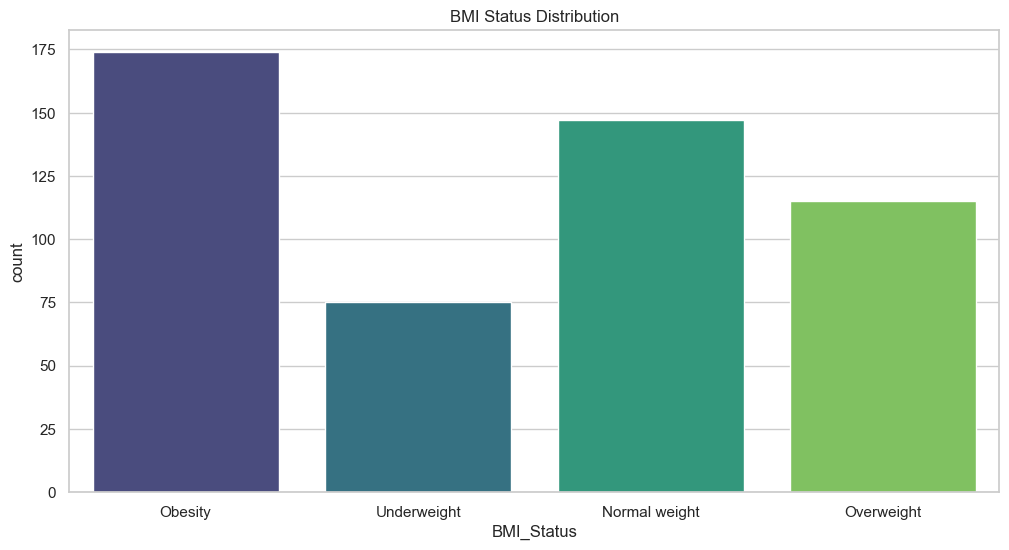

C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\428421962.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_gym_male, x='Fat_Status', palette="magma")


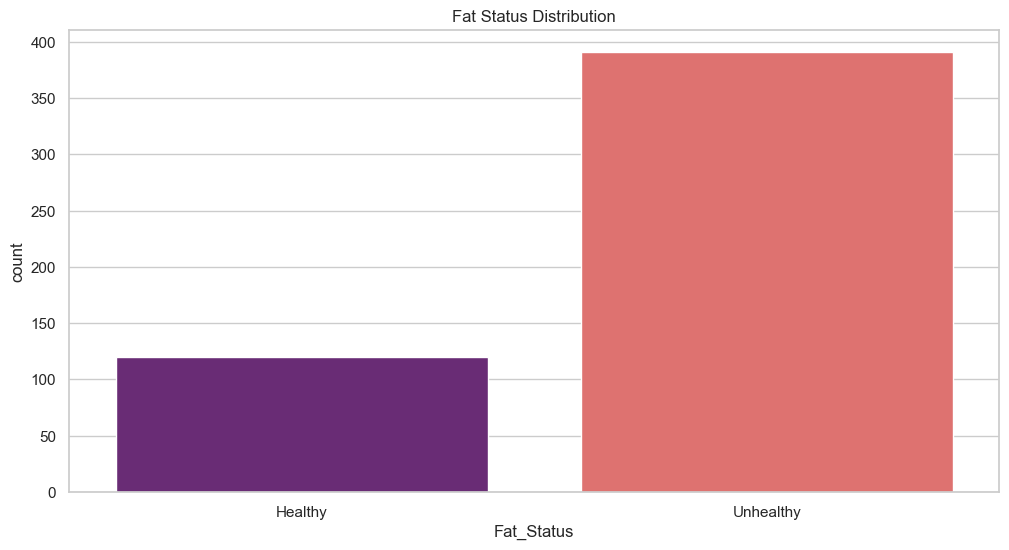

C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\428421962.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_gym_male, x='Muscle_Status', palette="coolwarm")


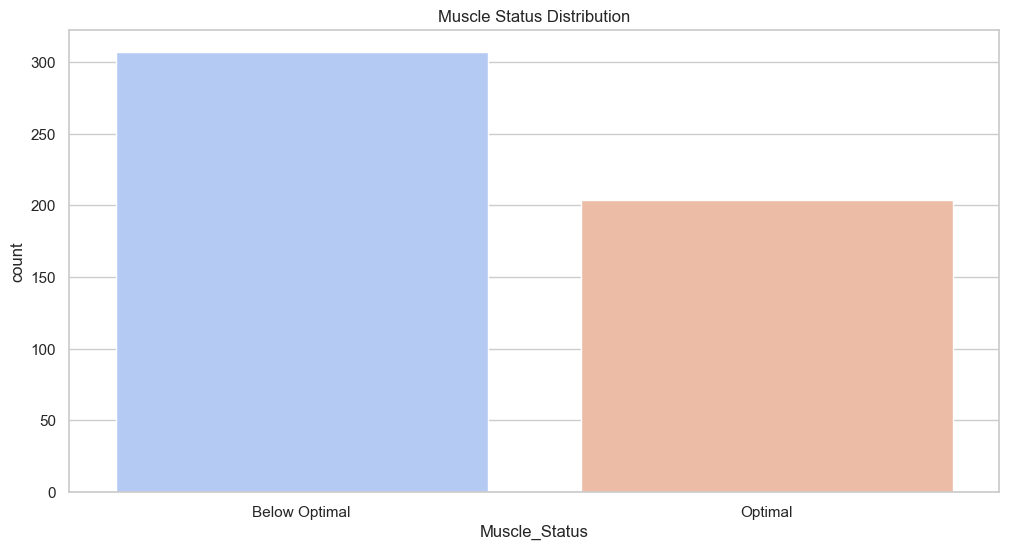

C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\428421962.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_gym_male, x='Interpretation', palette="pastel")


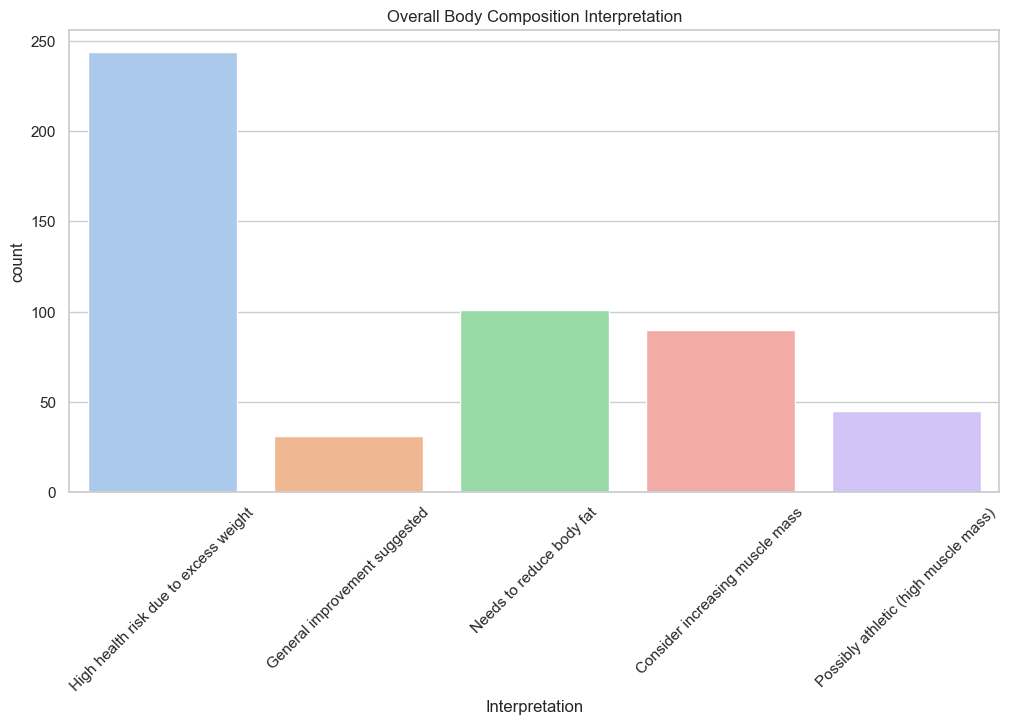

In [31]:
# Define categorization and interpretation functions (as previously provided)
def categorize_body_composition(row):
    if row['BMI'] < 18.5:
        bmi_status = "Underweight"
    elif 18.5 <= row['BMI'] <= 24.9:
        bmi_status = "Normal weight"
    elif 25 <= row['BMI'] <= 29.9:
        bmi_status = "Overweight"
    else:
        bmi_status = "Obesity"

    age = row['Age']
    fat_percentage = row['Fat_Percentage']
    if age <= 39:
        fat_status = "Healthy" if 8 <= fat_percentage <= 19 else "Unhealthy"
    elif 40 <= age <= 59:
        fat_status = "Healthy" if 11 <= fat_percentage <= 21 else "Unhealthy"
    else:
        fat_status = "Healthy" if 13 <= fat_percentage <= 24 else "Unhealthy"

    muscle_mass = row['Muscle_Mass_Percentage']
    if age <= 39:
        muscle_status = "Optimal" if 33 <= muscle_mass <= 39 else "Below Optimal"
    elif 40 <= age <= 59:
        muscle_status = "Optimal" if 30 <= muscle_mass <= 36 else "Below Optimal"
    else:
        muscle_status = "Optimal" if 27 <= muscle_mass <= 34 else "Below Optimal"

    return pd.Series([bmi_status, fat_status, muscle_status])

df_gym_male[['BMI_Status', 'Fat_Status', 'Muscle_Status']] = df_gym_male.apply(categorize_body_composition, axis=1)

def interpret_body_composition(row):
    bmi_status = row['BMI_Status']
    fat_status = row['Fat_Status']
    muscle_status = row['Muscle_Status']
    
    if bmi_status == "Normal weight" and fat_status == "Healthy" and muscle_status == "Optimal":
        return "Healthy and muscular"
    elif bmi_status == "Normal weight" and fat_status == "Unhealthy":
        return "Needs to reduce body fat"
    elif bmi_status == "Overweight" and muscle_status == "Optimal":
        return "Possibly athletic (high muscle mass)"
    elif bmi_status == "Overweight" or bmi_status == "Obesity":
        return "High health risk due to excess weight"
    elif muscle_status == "Below Optimal":
        return "Consider increasing muscle mass"
    else:
        return "General improvement suggested"

df_gym_male['Interpretation'] = df_gym_male.apply(interpret_body_composition, axis=1)

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=df_gym_male, x='BMI_Status', palette="viridis")
plt.title('BMI Status Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_gym_male, x='Fat_Status', palette="magma")
plt.title('Fat Status Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_gym_male, x='Muscle_Status', palette="coolwarm")
plt.title('Muscle Status Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_gym_male, x='Interpretation', palette="pastel")
plt.xticks(rotation=45)
plt.title('Overall Body Composition Interpretation')
plt.show()


C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\3649422831.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gym_male['BMI_Status'] = df_gym_male.apply(categorize_bmi, axis=1)
C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\3649422831.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gym_male['Fat_Status'] = df_gym_male.apply(categorize_fat_percentage, axis=1)
C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\3649422831.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

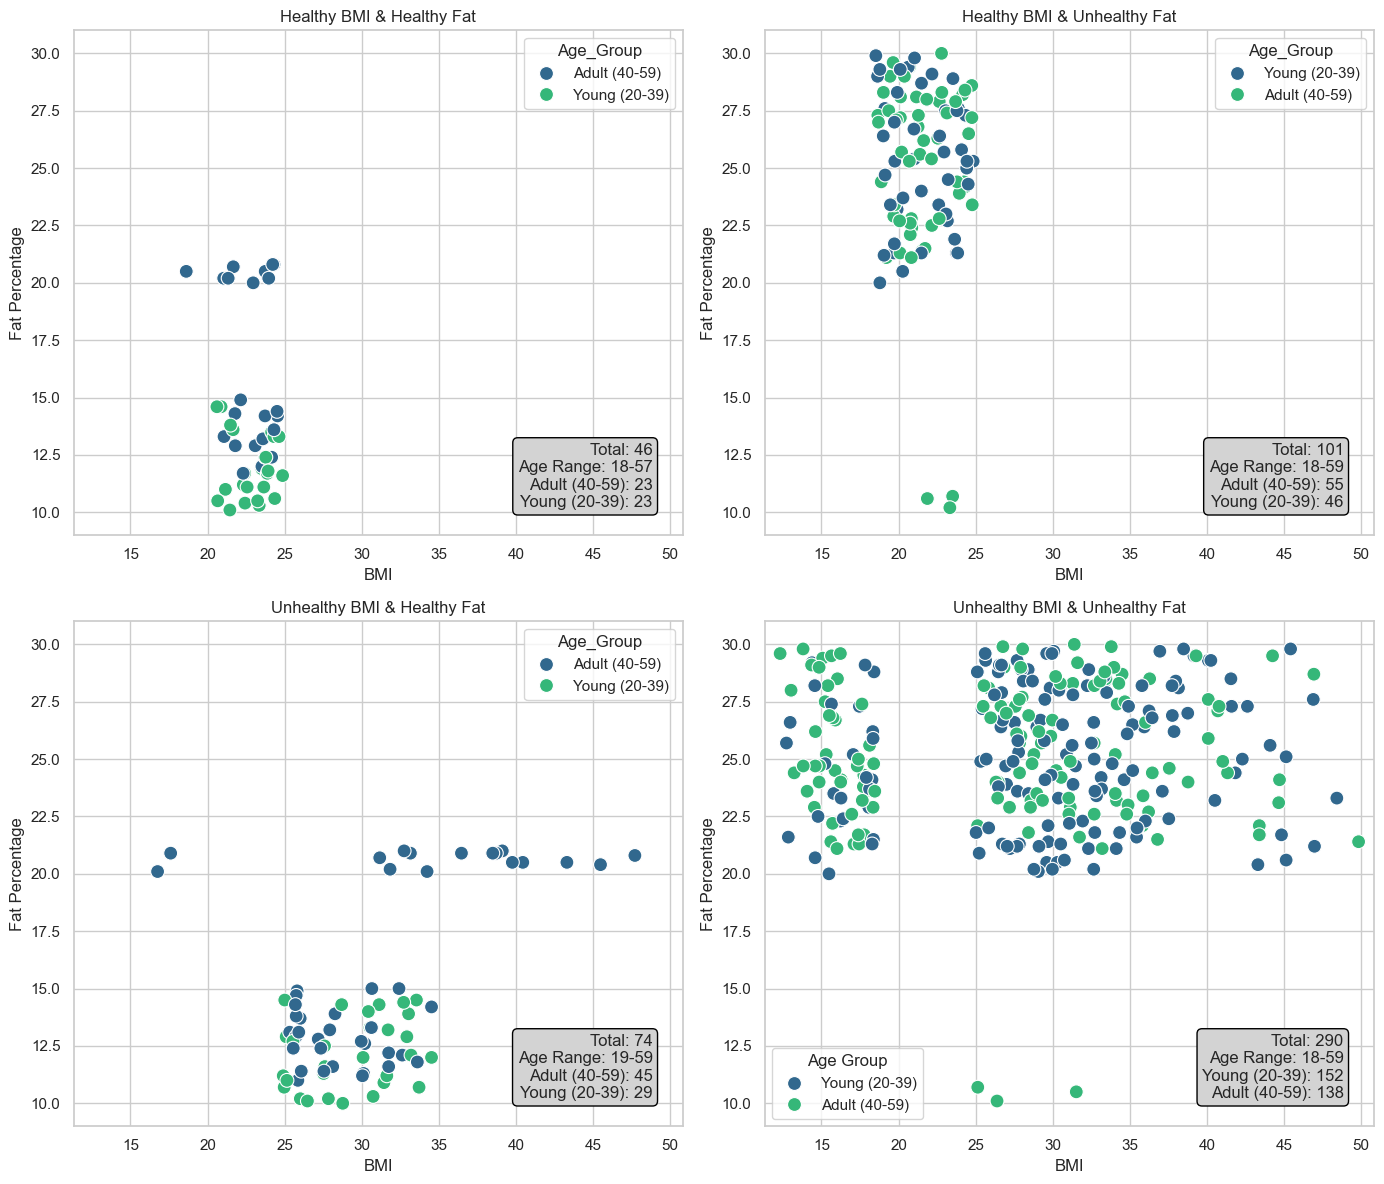

In [32]:
# Function to categorize BMI status
def categorize_bmi(row):
    if 18.5 <= row['BMI'] <= 24.9:
        return "Healthy BMI"
    else:
        return "Unhealthy BMI"

# Function to categorize body fat percentage by age
def categorize_fat_percentage(row):
    age = row['Age']
    fat_percentage = row['Fat_Percentage']
    
    if age <= 39:
        return "Healthy Fat" if 8 <= fat_percentage <= 19 else "Unhealthy Fat"
    elif 40 <= age <= 59:
        return "Healthy Fat" if 11 <= fat_percentage <= 21 else "Unhealthy Fat"
    else:
        return "Healthy Fat" if 13 <= fat_percentage <= 24 else "Unhealthy Fat"

# Function to segment by age group with age ranges in parentheses
def age_group(row):
    if row['Age'] <= 39:
        return "Young (20-39)"
    elif 40 <= row['Age'] <= 59:
        return "Adult (40-59)"
    else:
        return "Senior (60+)"

# Apply categorization functions
df_gym_male['BMI_Status'] = df_gym_male.apply(categorize_bmi, axis=1)
df_gym_male['Fat_Status'] = df_gym_male.apply(categorize_fat_percentage, axis=1)
df_gym_male['Age_Group'] = df_gym_male.apply(age_group, axis=1)

# Create a combined status column for the 4 categories
df_gym_male['Combined_Status'] = df_gym_male['BMI_Status'] + " & " + df_gym_male['Fat_Status']

# Plot configuration in a 2x2 matrix
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Filters for each health combination
combinations = {
    'Healthy BMI & Healthy Fat': (0, 0),
    'Healthy BMI & Unhealthy Fat': (0, 1),
    'Unhealthy BMI & Healthy Fat': (1, 0),
    'Unhealthy BMI & Unhealthy Fat': (1, 1)
}

# Scatter plots for each combination with age group labels, total count, and age range
for status, (i, j) in combinations.items():
    subset = df_gym_male[df_gym_male['Combined_Status'] == status]
    
    # Scatter plot of BMI vs. Fat Percentage
    sns.scatterplot(data=subset, x='BMI', y='Fat_Percentage', hue='Age_Group', palette='viridis', s=100, ax=axes[i, j])
    axes[i, j].set_title(status)
    axes[i, j].set_xlim(df_gym_male['BMI'].min() - 1, df_gym_male['BMI'].max() + 1)
    axes[i, j].set_ylim(df_gym_male['Fat_Percentage'].min() - 1, df_gym_male['Fat_Percentage'].max() + 1)
    axes[i, j].set_xlabel('BMI')
    axes[i, j].set_ylabel('Fat Percentage')
    
    # Count individuals by age group and get total count
    age_counts = subset['Age_Group'].value_counts()
    total_count = len(subset)
    
    # Calculate age range for this subset
    if not subset.empty:
        min_age = subset['Age'].min()
        max_age = subset['Age'].max()
        age_range_text = f"Age Range: {min_age}-{max_age}"
    else:
        age_range_text = "No data"
    
    # Format text with age group labels and ranges, counts, total, and age range
    counts_text = f"Total: {total_count}\n{age_range_text}\n" + \
                  "\n".join([f"{group}: {count}" for group, count in age_counts.items()])
    
    # Annotate count information and age range on the plot
    axes[i, j].text(0.95, 0.05, counts_text, transform=axes[i, j].transAxes,
                    fontsize=12, verticalalignment='bottom', horizontalalignment='right', 
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgrey"))

# Adjust layout and display plot
plt.tight_layout()
plt.legend(title='Age Group')
plt.show()


In [33]:
# Calculate the Pearson correlation coefficient between BMI and Fat Percentage
correlation = df_gym_male['BMI'].corr(df_gym_male['Fat_Percentage'])

print(f"The correlation coefficient between BMI and Fat Percentage is: {correlation:.2f}")


The correlation coefficient between BMI and Fat Percentage is: 0.01


# Hypothesis 2:
**Body composition based on muscle mass percentage and body fat percentage are good indicators of health**

**Approach:**
- Study the relationship between body fat percentage, muscle mass, and health markers such resting heart rate
- Compare different body composition profiles and evaluate their connection to fitness and chronic disease risk.

**Analysis Objective:**
- Validate that a body composition with a lower body fat percentage and an appropriate level of muscle mass correlates better with overall health than BMI alone.

# Healthy Resting Heart Rate by Age

Healthy resting heart rate (RHR) varies by age, generally decreasing with increased fitness and slightly increasing with age. Below are typical ranges for healthy resting BPM by age, supported by sources from the **American Heart Association (AHA)** and studies from reputable journals.

### Typical Healthy Resting Heart Rate by Age

- **Adults (18–25 years)**: 60–80 BPM
- **Adults (26–35 years)**: 60–80 BPM
- **Adults (36–45 years)**: 60–85 BPM
- **Adults (46–55 years)**: 60–85 BPM
- **Adults (56–65 years)**: 60–90 BPM
- **Seniors (65+ years)**: 60–95 BPM

These ranges are considered normal and healthy for most adults, though fitness level, medications, and individual health factors can cause variation.

### Sources
- **American Heart Association (AHA)**: The AHA provides guidelines on resting heart rate ranges and factors influencing RHR, especially in adults and seniors.
  - [AHA - About Heart Rates](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates)

- **National Institutes of Health (NIH)**: NIH studies examine resting heart rate variation by age and fitness level, noting the importance of RHR as a health indicator.
  - Example Article: ["Resting Heart Rate and Cardiovascular Disease in Older Adults"](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3202158/)

- **Journal of the American College of Cardiology (JACC)**: Research in JACC explores the relationship between RHR, age, and cardiovascular outcomes.
  - Example Article: ["Resting Heart Rate, Age, and Long-Term Cardiovascular Outcomes"](https://www.jacc.org/)

These sources provide evidence-based ranges for healthy resting heart rates across age groups, supporting the role of RHR as an indicator of cardiovascular health.


Numerical Summary of Resting BPM by Age Group and Health Status:

  Age_Group BPM_Health_Status       mean  count
0     26-35           Healthy  66.876712     73
1     26-35         Unhealthy  53.925000     40
2     36-45           Healthy  67.506173     81
3     36-45         Unhealthy  54.058824     51
4     46-55           Healthy  66.741176     85
5     46-55         Unhealthy  54.000000     42
6     56-65           Healthy  66.571429     28
7     56-65         Unhealthy  54.190476     21
8  Under 25           Healthy  67.962963     54
9  Under 25         Unhealthy  54.694444     36


C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\1230804814.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gym_male['BPM_Health_Status'] = df_gym_male.apply(classify_bpm_health, axis=1)
C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\1230804814.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gym_male['Age_Group'] = df_gym_male.apply(age_group, axis=1)


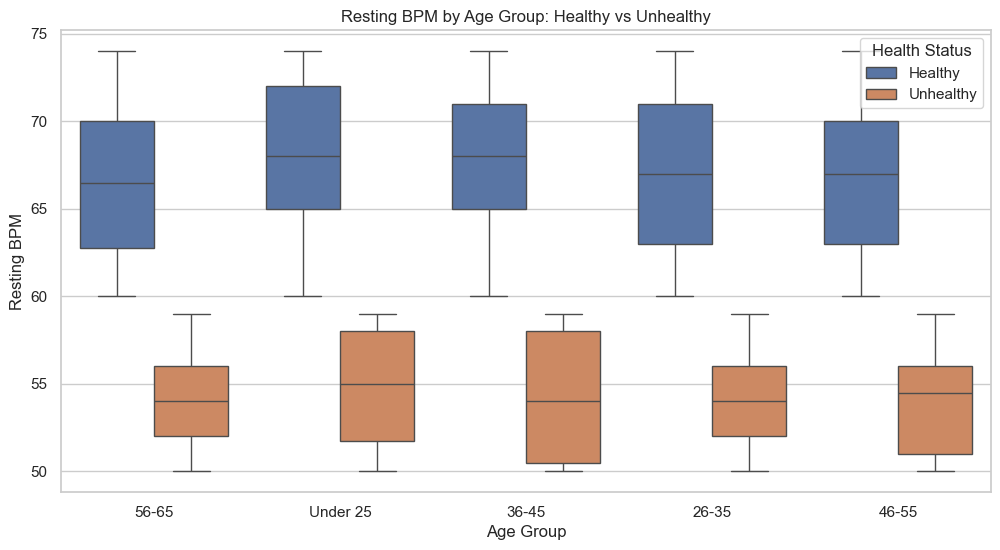

In [34]:
# Define healthy resting BPM ranges by age
def classify_bpm_health(row):
    age = row['Age']
    bpm = row['Resting_BPM']
    if age <= 25:
        return "Healthy" if 60 <= bpm <= 80 else "Unhealthy"
    elif 26 <= age <= 35:
        return "Healthy" if 60 <= bpm <= 80 else "Unhealthy"
    elif 36 <= age <= 45:
        return "Healthy" if 60 <= bpm <= 85 else "Unhealthy"
    elif 46 <= age <= 55:
        return "Healthy" if 60 <= bpm <= 85 else "Unhealthy"
    elif 56 <= age <= 65:
        return "Healthy" if 60 <= bpm <= 90 else "Unhealthy"
    else:
        return "Healthy" if 60 <= bpm <= 95 else "Unhealthy"

# Apply function to create a health classification column
df_gym_male['BPM_Health_Status'] = df_gym_male.apply(classify_bpm_health, axis=1)

# Define age groups for easier visualization
def age_group(row):
    if row['Age'] <= 25:
        return "Under 25"
    elif 26 <= row['Age'] <= 35:
        return "26-35"
    elif 36 <= row['Age'] <= 45:
        return "36-45"
    elif 46 <= row['Age'] <= 55:
        return "46-55"
    elif 56 <= row['Age'] <= 65:
        return "56-65"
    else:
        return "66+"

# Create age group column
df_gym_male['Age_Group'] = df_gym_male.apply(age_group, axis=1)

# Generate numerical summary of resting BPM by Age Group and Health Status
summary = df_gym_male.groupby(['Age_Group', 'BPM_Health_Status'])['Resting_BPM'].agg(['mean', 'count']).reset_index()
print("Numerical Summary of Resting BPM by Age Group and Health Status:\n")
print(summary)

# Plot Resting BPM by age group with Health Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_male, x='Age_Group', y='Resting_BPM', hue='BPM_Health_Status')
plt.title('Resting BPM by Age Group: Healthy vs Unhealthy')
plt.xlabel('Age Group')
plt.ylabel('Resting BPM')
plt.legend(title="Health Status")
plt.show()





C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\1891995847.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gym_male['BPM_Health_Status'] = df_gym_male.apply(classify_bpm_health, axis=1)
C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\1891995847.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gym_male['Age_Group'] = df_gym_male.apply(age_group, axis=1)


Numerical Summary of Resting BPM by Age Group and Health Status:

  Age_Group BPM_Health_Status       mean  count
0     26-35           Healthy  66.876712     73
1     26-35         Unhealthy  53.925000     40
2     36-45           Healthy  67.506173     81
3     36-45         Unhealthy  54.058824     51
4     46-55           Healthy  66.741176     85
5     46-55         Unhealthy  54.000000     42
6     56-65           Healthy  66.571429     28
7     56-65         Unhealthy  54.190476     21
8  Under 25           Healthy  67.962963     54
9  Under 25         Unhealthy  54.694444     36

Overall Summary of Resting BPM by Health Status (Total):

  BPM_Health_Status       mean  count
0           Healthy  67.155763    321
1         Unhealthy  54.152632    190


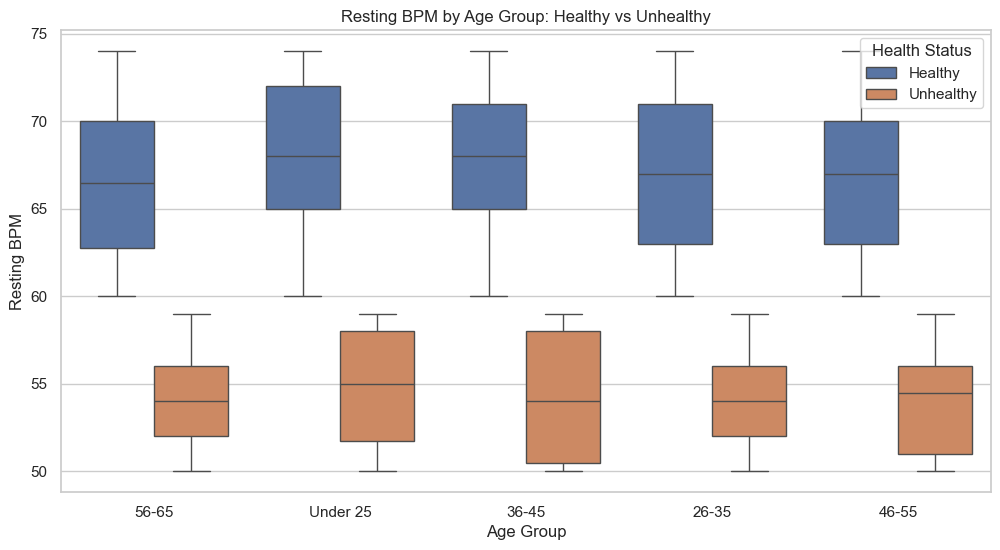

In [35]:
# Define healthy resting BPM ranges by age
def classify_bpm_health(row):
    age = row['Age']
    bpm = row['Resting_BPM']
    if age <= 25:
        return "Healthy" if 60 <= bpm <= 80 else "Unhealthy"
    elif 26 <= age <= 35:
        return "Healthy" if 60 <= bpm <= 80 else "Unhealthy"
    elif 36 <= age <= 45:
        return "Healthy" if 60 <= bpm <= 85 else "Unhealthy"
    elif 46 <= age <= 55:
        return "Healthy" if 60 <= bpm <= 85 else "Unhealthy"
    elif 56 <= age <= 65:
        return "Healthy" if 60 <= bpm <= 90 else "Unhealthy"
    else:
        return "Healthy" if 60 <= bpm <= 95 else "Unhealthy"

# Apply function to create a health classification column
df_gym_male['BPM_Health_Status'] = df_gym_male.apply(classify_bpm_health, axis=1)

# Define age groups for easier visualization
def age_group(row):
    if row['Age'] <= 25:
        return "Under 25"
    elif 26 <= row['Age'] <= 35:
        return "26-35"
    elif 36 <= row['Age'] <= 45:
        return "36-45"
    elif 46 <= row['Age'] <= 55:
        return "46-55"
    elif 56 <= row['Age'] <= 65:
        return "56-65"
    else:
        return "66+"

# Create age group column
df_gym_male['Age_Group'] = df_gym_male.apply(age_group, axis=1)

# Generate numerical summary of resting BPM by Age Group and Health Status
age_group_summary = df_gym_male.groupby(['Age_Group', 'BPM_Health_Status'])['Resting_BPM'].agg(['mean', 'count']).reset_index()
print("Numerical Summary of Resting BPM by Age Group and Health Status:\n")
print(age_group_summary)

# Generate total summary of resting BPM by Health Status (without age division)
total_summary = df_gym_male.groupby('BPM_Health_Status')['Resting_BPM'].agg(['mean', 'count']).reset_index()
print("\nOverall Summary of Resting BPM by Health Status (Total):\n")
print(total_summary)

# Plot Resting BPM by age group with Health Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_male, x='Age_Group', y='Resting_BPM', hue='BPM_Health_Status')
plt.title('Resting BPM by Age Group: Healthy vs Unhealthy')
plt.xlabel('Age Group')
plt.ylabel('Resting BPM')
plt.legend(title="Health Status")
plt.show()


C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\364594934.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gym_male['Body_Fat_Health_Status'] = df_gym_male.apply(classify_body_fat_health, axis=1)
C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\364594934.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gym_male['Age_Group'] = df_gym_male.apply(age_group, axis=1)


Numerical Summary of Body Fat Percentage by Age Group and Health Status:

  Age_Group Body_Fat_Health_Status       mean  count
0     26-35                Healthy  12.639130     23
1     26-35              Unhealthy  25.681111     90
2     36-45                Healthy  13.575862     29
3     36-45              Unhealthy  25.092233    103
4     46-55                Healthy  16.218919     37
5     46-55              Unhealthy  25.170000     90
6     56-65                Healthy  16.025000     12
7     56-65              Unhealthy  24.851351     37
8  Under 25                Healthy  11.836842     19
9  Under 25              Unhealthy  24.545070     71

Overall Summary of Body Fat Percentage by Health Status (Total):

  Body_Fat_Health_Status       mean  count
0                Healthy  14.180833    120
1              Unhealthy  25.123529    391


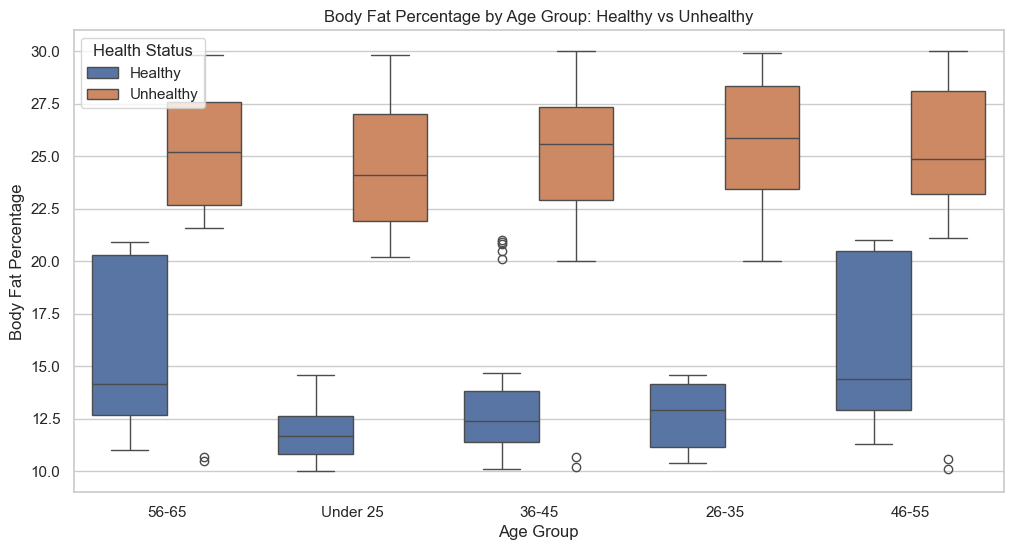

In [36]:
# Define healthy body fat percentage ranges by age
def classify_body_fat_health(row):
    age = row['Age']
    body_fat = row['Fat_Percentage']
    if age <= 39:
        return "Healthy" if 8 <= body_fat <= 19 else "Unhealthy"
    elif 40 <= age <= 59:
        return "Healthy" if 11 <= body_fat <= 21 else "Unhealthy"
    else:
        return "Healthy" if 13 <= body_fat <= 24 else "Unhealthy"

# Apply function to create a health classification column based on body fat
df_gym_male['Body_Fat_Health_Status'] = df_gym_male.apply(classify_body_fat_health, axis=1)

# Define age groups for easier visualization
def age_group(row):
    if row['Age'] <= 25:
        return "Under 25"
    elif 26 <= row['Age'] <= 35:
        return "26-35"
    elif 36 <= row['Age'] <= 45:
        return "36-45"
    elif 46 <= row['Age'] <= 55:
        return "46-55"
    elif 56 <= row['Age'] <= 65:
        return "56-65"
    else:
        return "66+"

# Create age group column
df_gym_male['Age_Group'] = df_gym_male.apply(age_group, axis=1)

# Generate numerical summary of body fat by Age Group and Health Status
age_group_summary = df_gym_male.groupby(['Age_Group', 'Body_Fat_Health_Status'])['Fat_Percentage'].agg(['mean', 'count']).reset_index()
print("Numerical Summary of Body Fat Percentage by Age Group and Health Status:\n")
print(age_group_summary)

# Generate total summary of body fat by Health Status (without age division)
total_summary = df_gym_male.groupby('Body_Fat_Health_Status')['Fat_Percentage'].agg(['mean', 'count']).reset_index()
print("\nOverall Summary of Body Fat Percentage by Health Status (Total):\n")
print(total_summary)

# Plot Body Fat Percentage by age group with Health Status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_male, x='Age_Group', y='Fat_Percentage', hue='Body_Fat_Health_Status')
plt.title('Body Fat Percentage by Age Group: Healthy vs Unhealthy')
plt.xlabel('Age Group')
plt.ylabel('Body Fat Percentage')
plt.legend(title="Health Status")
plt.show()


Correlation between BMI and Resting BPM: -0.02
Correlation between Body Fat Percentage and Resting BPM: -0.07


C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\3046135833.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gym_male['BMI_Health_Status'] = df_gym_male['BMI'].apply(classify_bmi_health)
C:\Users\mikel\AppData\Local\Temp\ipykernel_2344\3046135833.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gym_male['Body_Fat_Health_Status'] = df_gym_male.apply(classify_body_fat_health, axis=1)


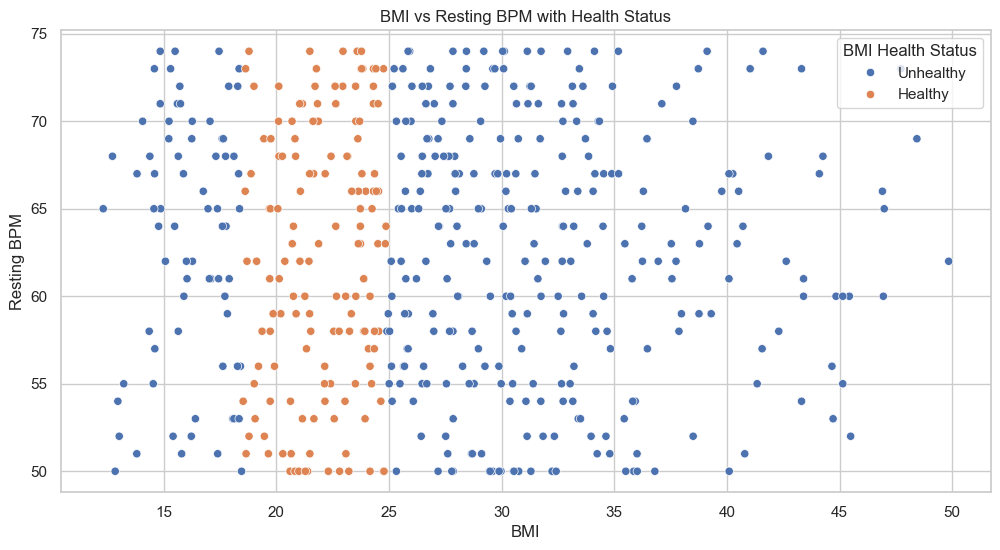

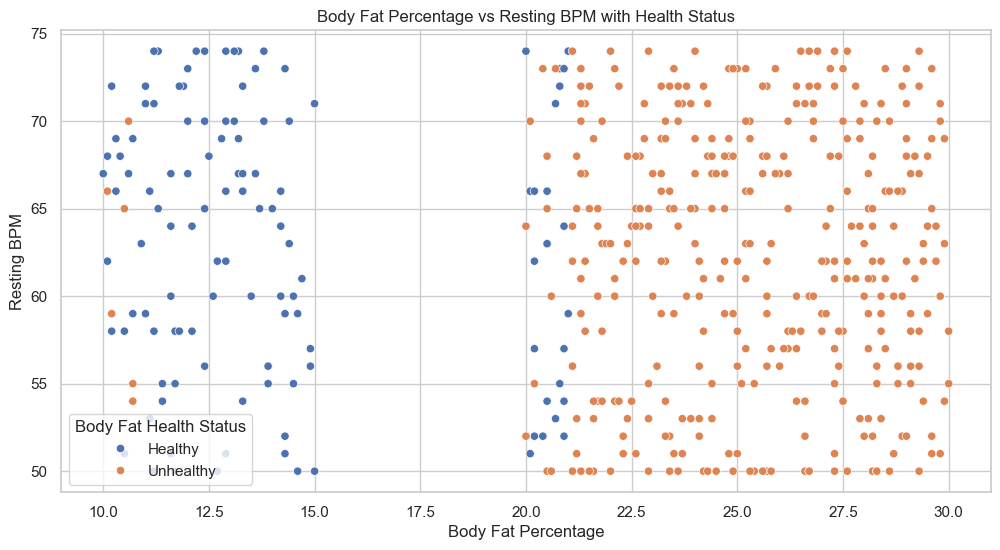

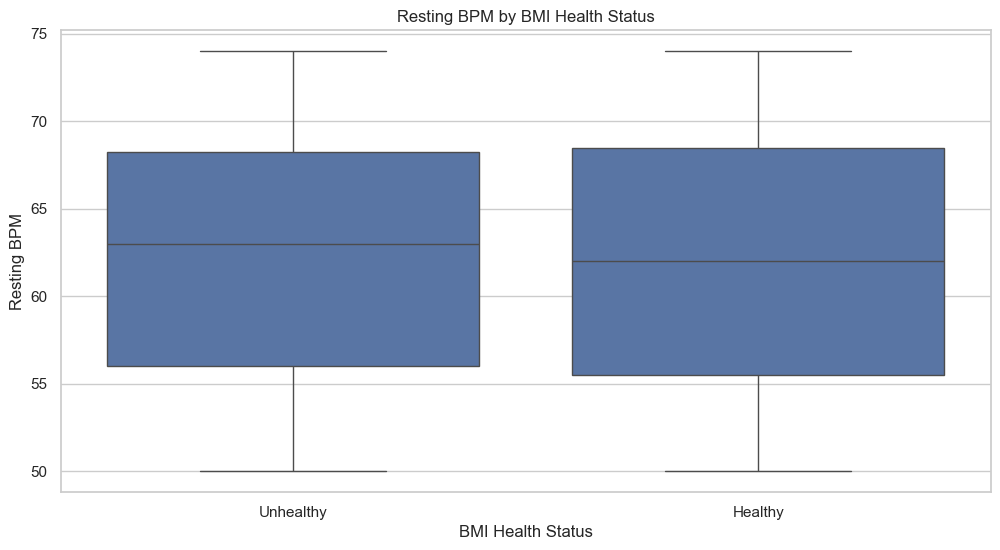

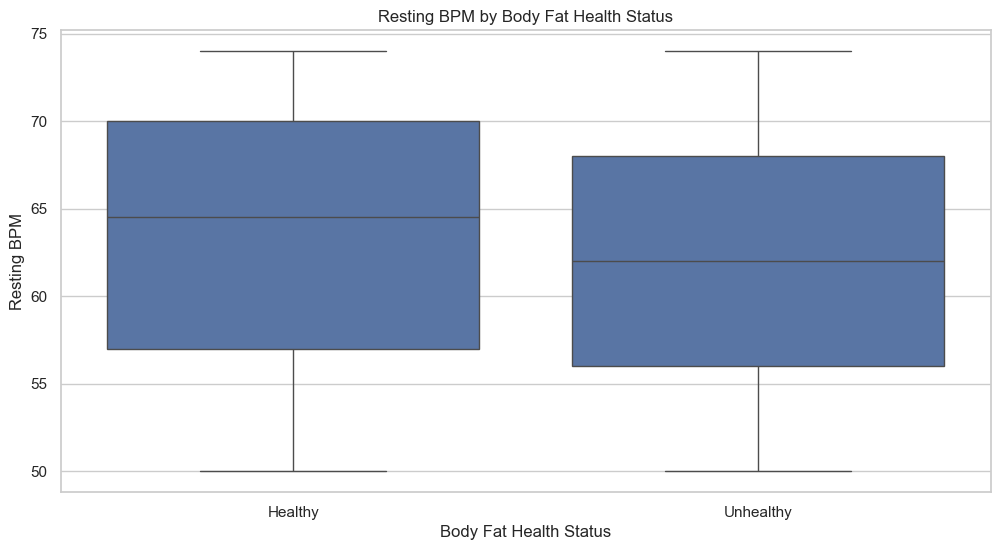

In [37]:
# Step 1: Correlate BMI and Body Fat with Resting BPM
bmi_corr, _ = pearsonr(df_gym_male['BMI'], df_gym_male['Resting_BPM'])
fat_corr, _ = pearsonr(df_gym_male['Fat_Percentage'], df_gym_male['Resting_BPM'])

print(f"Correlation between BMI and Resting BPM: {bmi_corr:.2f}")
print(f"Correlation between Body Fat Percentage and Resting BPM: {fat_corr:.2f}")

# Step 2: Define Health Status Based on BMI and Body Fat Percentage

# Define healthy ranges for BMI and Body Fat Percentage
def classify_bmi_health(bmi):
    return "Healthy" if 18.5 <= bmi <= 24.9 else "Unhealthy"

def classify_body_fat_health(row):
    age = row['Age']
    body_fat = row['Fat_Percentage']
    if age <= 39:
        return "Healthy" if 8 <= body_fat <= 19 else "Unhealthy"
    elif 40 <= age <= 59:
        return "Healthy" if 11 <= body_fat <= 21 else "Unhealthy"
    else:
        return "Healthy" if 13 <= body_fat <= 24 else "Unhealthy"

# Apply classifications
df_gym_male['BMI_Health_Status'] = df_gym_male['BMI'].apply(classify_bmi_health)
df_gym_male['Body_Fat_Health_Status'] = df_gym_male.apply(classify_body_fat_health, axis=1)

# Step 3: Visualize Comparisons

# Scatter plot of BMI vs Resting BPM with Health Status
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_gym_male, x='BMI', y='Resting_BPM', hue='BMI_Health_Status')
plt.title('BMI vs Resting BPM with Health Status')
plt.xlabel('BMI')
plt.ylabel('Resting BPM')
plt.legend(title="BMI Health Status")
plt.show()

# Scatter plot of Body Fat Percentage vs Resting BPM with Health Status
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_gym_male, x='Fat_Percentage', y='Resting_BPM', hue='Body_Fat_Health_Status')
plt.title('Body Fat Percentage vs Resting BPM with Health Status')
plt.xlabel('Body Fat Percentage')
plt.ylabel('Resting BPM')
plt.legend(title="Body Fat Health Status")
plt.show()

# Box plot to compare Resting BPM by Health Status based on BMI vs Body Fat
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_male, x='BMI_Health_Status', y='Resting_BPM')
plt.title('Resting BPM by BMI Health Status')
plt.xlabel('BMI Health Status')
plt.ylabel('Resting BPM')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gym_male, x='Body_Fat_Health_Status', y='Resting_BPM')
plt.title('Resting BPM by Body Fat Health Status')
plt.xlabel('Body Fat Health Status')
plt.ylabel('Resting BPM')
plt.show()
